In [ ]:
%cd /content/drive/MyDrive/Dataset/ipage

/content/drive/MyDrive/Dataset/ipage


# Import

In [ ]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('IPAGE_SoilData_cleaned.csv')
df = df.drop('Data Collection Year', axis=1) # we don't need this
df = df.fillna('UNK (surface)')

In [ ]:
df.head()

,Area,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95
3,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00
4,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04


In [ ]:
df.shape

(618, 12)



*   There are 618 observations and 12 columns



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   soil group             618 non-null    object 
 2   Land class             618 non-null    object 
 3   knit (surface)         618 non-null    object 
 4   pH                     618 non-null    float64
 5   SOC (%)                618 non-null    float64
 6   Nitrogen N (%)         618 non-null    float64
 7   Potassium K (meq/100)  618 non-null    float64
 8   Phosphorus P (ug/g)    618 non-null    float64
 9   Sulfur S (ug/g)        618 non-null    float64
 10  Boron B (ug/g)         618 non-null    float64
 11  Zinc Zn (ug/g)         618 non-null    float64
dtypes: float64(8), object(4)
memory usage: 58.1+ KB


In [ ]:
# check for null values
df.isnull().sum()

,0
Area,0
soil group,0
Land class,0
knit (surface),0
pH,0
SOC (%),0
Nitrogen N (%),0
Potassium K (meq/100),0
Phosphorus P (ug/g),0
Sulfur S (ug/g),0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,618.0,5.236942,0.469949,4.10,4.9000,5.20,5.4000,7.80
SOC (%),618.0,1.792214,1.034159,0.10,1.3525,1.70,2.1600,20.40
Nitrogen N (%),618.0,0.111832,0.507259,0.00,0.0700,0.09,0.1100,12.60
Potassium K (meq/100),618.0,0.241246,0.581693,0.00,0.1100,0.17,0.2875,14.20
Phosphorus P (ug/g),618.0,31.144256,38.078580,0.00,8.7850,16.00,37.7000,254.70
Sulfur S (ug/g),618.0,15.340676,11.062096,0.40,8.7025,12.60,19.0000,85.00
Boron B (ug/g),618.0,0.348997,0.258153,0.00,0.2300,0.30,0.4000,2.66
Zinc Zn (ug/g),618.0,1.039191,0.976144,0.08,0.5200,0.82,1.1000,10.58


* **P**, **S**, **B**, **Zn** (ug/g) as Units of measuremnt, K has (meq/100)
and N, SOC has measurements in percentage.
* Apart from **pH** all the other numerical variables including the target variables **SOC**, **B**, **Zn** has some really extreme values, indication of having outliers.

In [ ]:
target_cols = ['SOC (%)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# categorical_cols

num_cols = [col for col in df.columns if col not in target_cols + cat_cols]
# numerical_cols

In [ ]:
for col in cat_cols:
  print(f"{col}, ({df[col].nunique()}) unique values: \n{df[col].unique()}\n")

Area, (5) unique values: 
['Mithpukur' 'Pirgacha ' 'Gangachara' 'Kaunia upazila' 'Taraganj Thana']

soil group, (27) unique values: 
['belab' 'Noadda' 'Sahapur' 'the moon' 'the pen ' 'Khilgaon' 'Pirgacha'
 'Palashbari' 'Berries' 'Gangachara' 'Kaunia' 'Imadpur '
 'Alluvial soil of Teesta' 'Teesta sandy soil' 'Kachna ' 'The militants'
 'Berries ' 'Imadpur' 'The militants ' 'Kachna' 'Chilmari' 'Saghata '
 'recession' 'Menanagar' 'Bhimpur' 'Indrail' 'chilmari']

Land class, (5) unique values: 
['high ground' 'Medium high land' 'Medium low land'
 'Deep medium high land' 'Shallow to medium high land']

knit (surface), (6) unique values: 
['Clay loam ' 'loam' 'brick' 'in the sand' 'UNK (surface)' 'loam clay']



# Count plots of the Categorical features

In [ ]:
def count_plot(df, cat_col, hue=None, figsize=(8, 6), palette='viridis'):
    plt.figure(figsize=figsize)
    order = df[cat_col].value_counts().index
    if not hue:
        hue = cat_col

    with sns.axes_style("darkgrid"):
        ax = sns.countplot(data=df,
                        x=cat_col,
                        order=order,
                        hue=hue,
                        palette=palette,
                        legend=True if hue else False)
        for p in ax.patches:
            count = int(p.get_height())  # Get count value
            x_pos = p.get_x() + p.get_width() / 2  # X position for the label
            y_pos = p.get_y() + p.get_height() + 3   # Y position (center of the bar)
            ax.text(x_pos, y_pos, count, ha='left', va='center')  # Add text
            ax.tick_params(axis='x', labelrotation=90)

        plt.title(f'Count Plot [{cat_col}]')
        plt.tight_layout()
        plt.show()

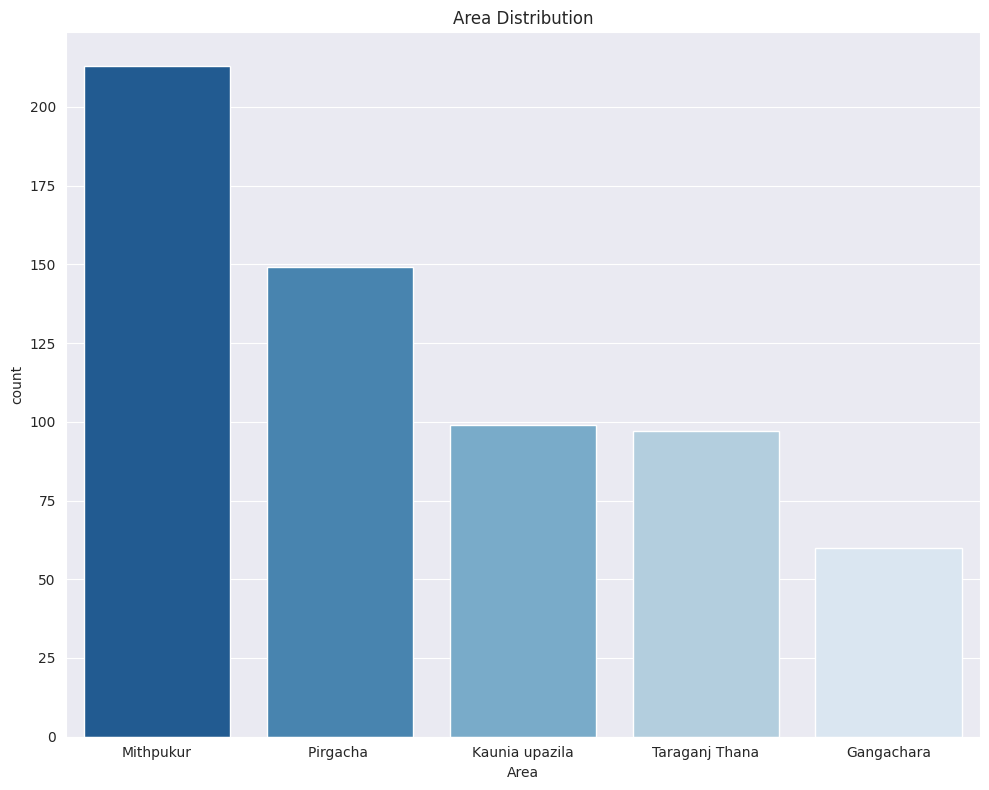

In [ ]:
plt.figure(figsize=(10, 8))
order = df['Area'].value_counts().index
with sns.axes_style("darkgrid"):
    ax = sns.countplot(data=df,
                    x='Area',
                    order=order,
                    hue='Area',
                    hue_order=order,
                    palette='Blues_r',
                    legend=False)

plt.title(f"Area Distribution")
plt.tight_layout()
plt.show()

* Most soli data are collected from **Mithapukur** and the least from **Gangachara**

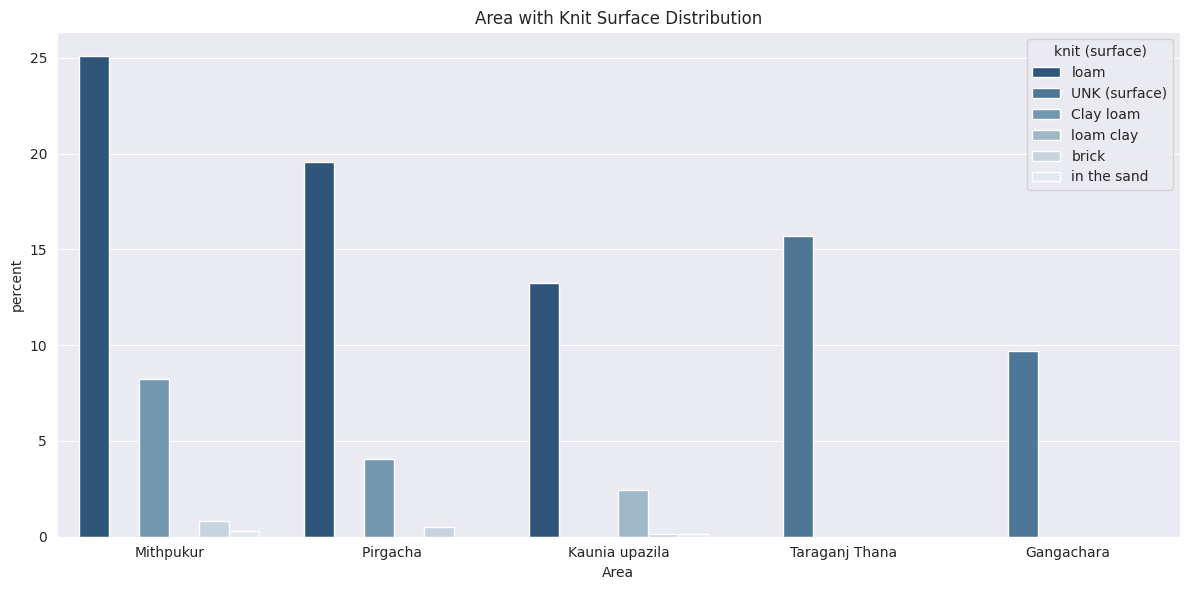

In [ ]:
plt.figure(figsize=(12, 6))
order = df['Area'].value_counts().index
hue_order = df['knit (surface)'].value_counts().index
with sns.axes_style("darkgrid"):
    ax = sns.countplot(data=df,
                       x='Area',
                       order=order,
                       hue='knit (surface)',
                       hue_order=hue_order,
                       palette='Blues_r',
                       saturation=0.5,
                       stat='percent',
                       legend=True)

plt.title(f"Area with Knit Surface Distribution")
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('Area').agg(
    count=('knit (surface)', 'value_counts'),
).reset_index()

,Area,knit (surface),count
0,Gangachara,UNK (surface),60
1,Kaunia upazila,loam,82
2,Kaunia upazila,loam clay,15
3,Kaunia upazila,brick,1
4,Kaunia upazila,in the sand,1
5,Mithpukur,loam,155
6,Mithpukur,Clay loam,51
7,Mithpukur,brick,5
8,Mithpukur,in the sand,2
9,Pirgacha,loam,121


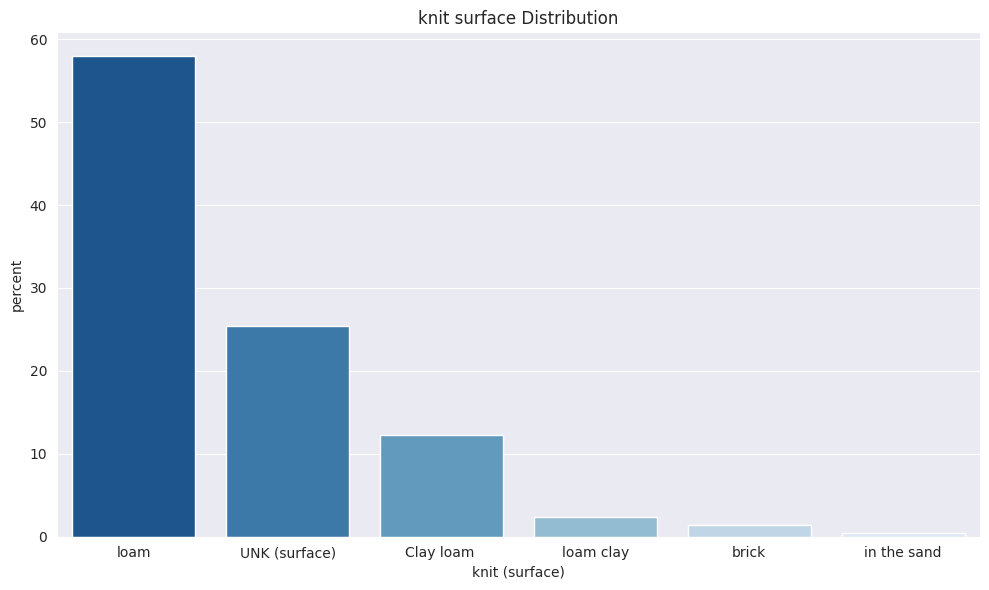

In [ ]:
plt.figure(figsize=(10, 6))
order = df['knit (surface)'].value_counts().index
with sns.axes_style("darkgrid"):
    ax = sns.countplot(data=df,
                    x='knit (surface)',
                    order=order,
                    hue='knit (surface)',
                    hue_order=order,
                    palette='Blues_r',
                    stat='percent',
                    legend=False)

plt.title(f"knit surface Distribution")
plt.tight_layout()
plt.show()

In [ ]:
df['knit (surface)'].value_counts(normalize=True).reset_index()

,knit (surface),proportion
0,loam,0.579288
1,UNK (surface),0.254045
2,Clay loam,0.122977
3,loam clay,0.024272
4,brick,0.014563
5,in the sand,0.004854


* There aren't any regions that includes all types of knit surface.
* The most (4) knit surface is found in **Kaunia** and **Mithapukur**
* This shows poor distribution of knit surface in the given region.
* Most common types of knit surface is **Loam** which is about the 57% of the total dataset. **Loam** can be defined as the perfect type of soil to grow plants. It has different variations depending on the mixture of other types of soil. **Clay Loam** or **Loam Clay** is the type where clay is more abundant.
* Loam and Loam Clay are found in 3 out of 5 regions. The other two regions **Gangachara** and **Taraganj Thana** has only one type of knit surface data and is undefined.
* **Loam Clay** and **Clay Loam** are probably the same types of soil. So, we can treat them as the same.

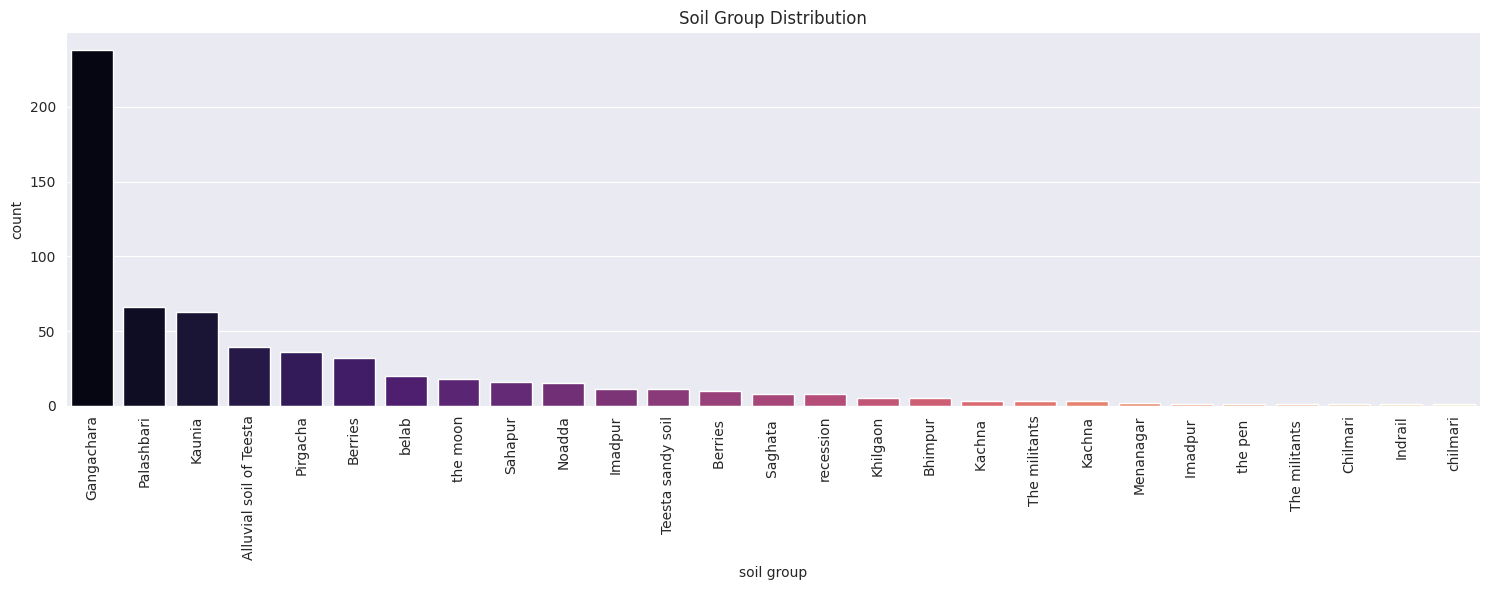

In [ ]:
plt.figure(figsize=(15, 6))
col = 'soil group'
order = df[col].value_counts().index
with sns.axes_style("darkgrid"):
    ax = sns.countplot(data=df,
                    x=col,
                    order=order,
                    hue=col,
                    hue_order=order,
                    palette='magma',
                    legend=False)

plt.title(f"Soil Group Distribution")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

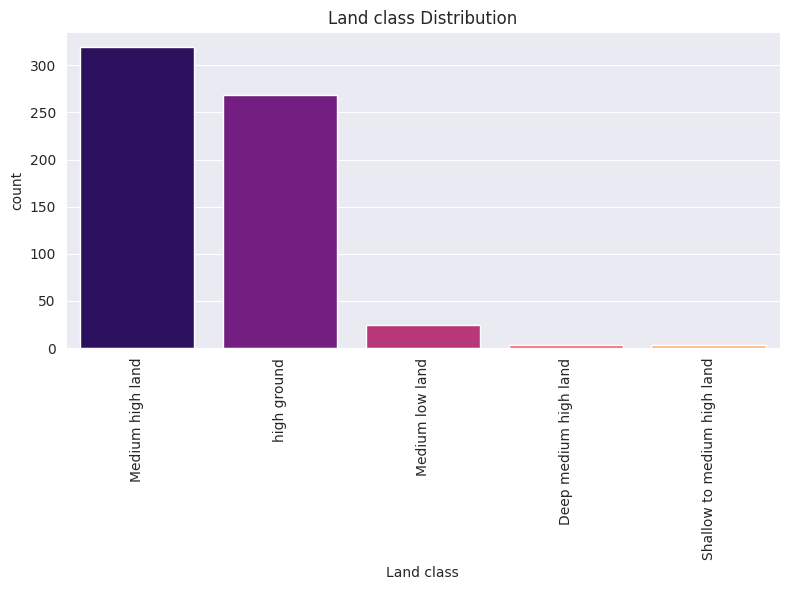

In [ ]:
plt.figure(figsize=(8, 6))
col = 'Land class'
order = df[col].value_counts().index
with sns.axes_style("darkgrid"):
    ax = sns.countplot(data=df,
                    x=col,
                    order=order,
                    hue=col,
                    hue_order=order,
                    palette='magma',
                    saturation=1,
                    legend=False)

plt.title(f"Land class Distribution")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* **Soil Group** and **Land Class** shows highly imbalanced classes.
* Most **Soil Group** observations are from **Gangachara**
* Most of the Lands are **Medium high land** and **High ground** type

## Skewness and kurtosis

In [ ]:
# for feature columns

for col in num_cols:
    print(f"{col}\nSkew: {df[col].skew()}\nKurtosis: {df[col].kurt()}\n")

pH
Skew: 1.2457086046485975
Kurtosis: 3.518202337891109

Nitrogen N (%)
Skew: 24.273522024476133
Kurtosis: 598.1980662302283

Potassium K (meq/100)
Skew: 22.48827842323524
Kurtosis: 539.696920470605

Phosphorus P (ug/g)
Skew: 2.6204366117054834
Kurtosis: 7.9917981031786915

Sulfur S (ug/g)
Skew: 1.9051789386025497
Kurtosis: 5.833945698085442



* All the feature columns are right skewed, which indicates that there are extreme values that are far right to the mean of the distribution

* **N** and **K** are highly skewed.
* **pH**, **P** and **S** are moderately skewed in respect to **N** and **K**

In [ ]:
# for target columns

for col in target_cols:
    print(f"{col}\nSkew: {df[col].skew()}\nKurtosis: {df[col].kurt()}\n")

SOC (%)
Skew: 9.632944630840102
Kurtosis: 169.61928881426041

Boron B (ug/g)
Skew: 3.4371440947102445
Kurtosis: 18.40382787695873

Zinc Zn (ug/g)
Skew: 3.9549317569032034
Kurtosis: 24.20218517855892



* The three target variables each has high skewness and again they each has right tail skewness.
* **SOC (%)** has the most skewness

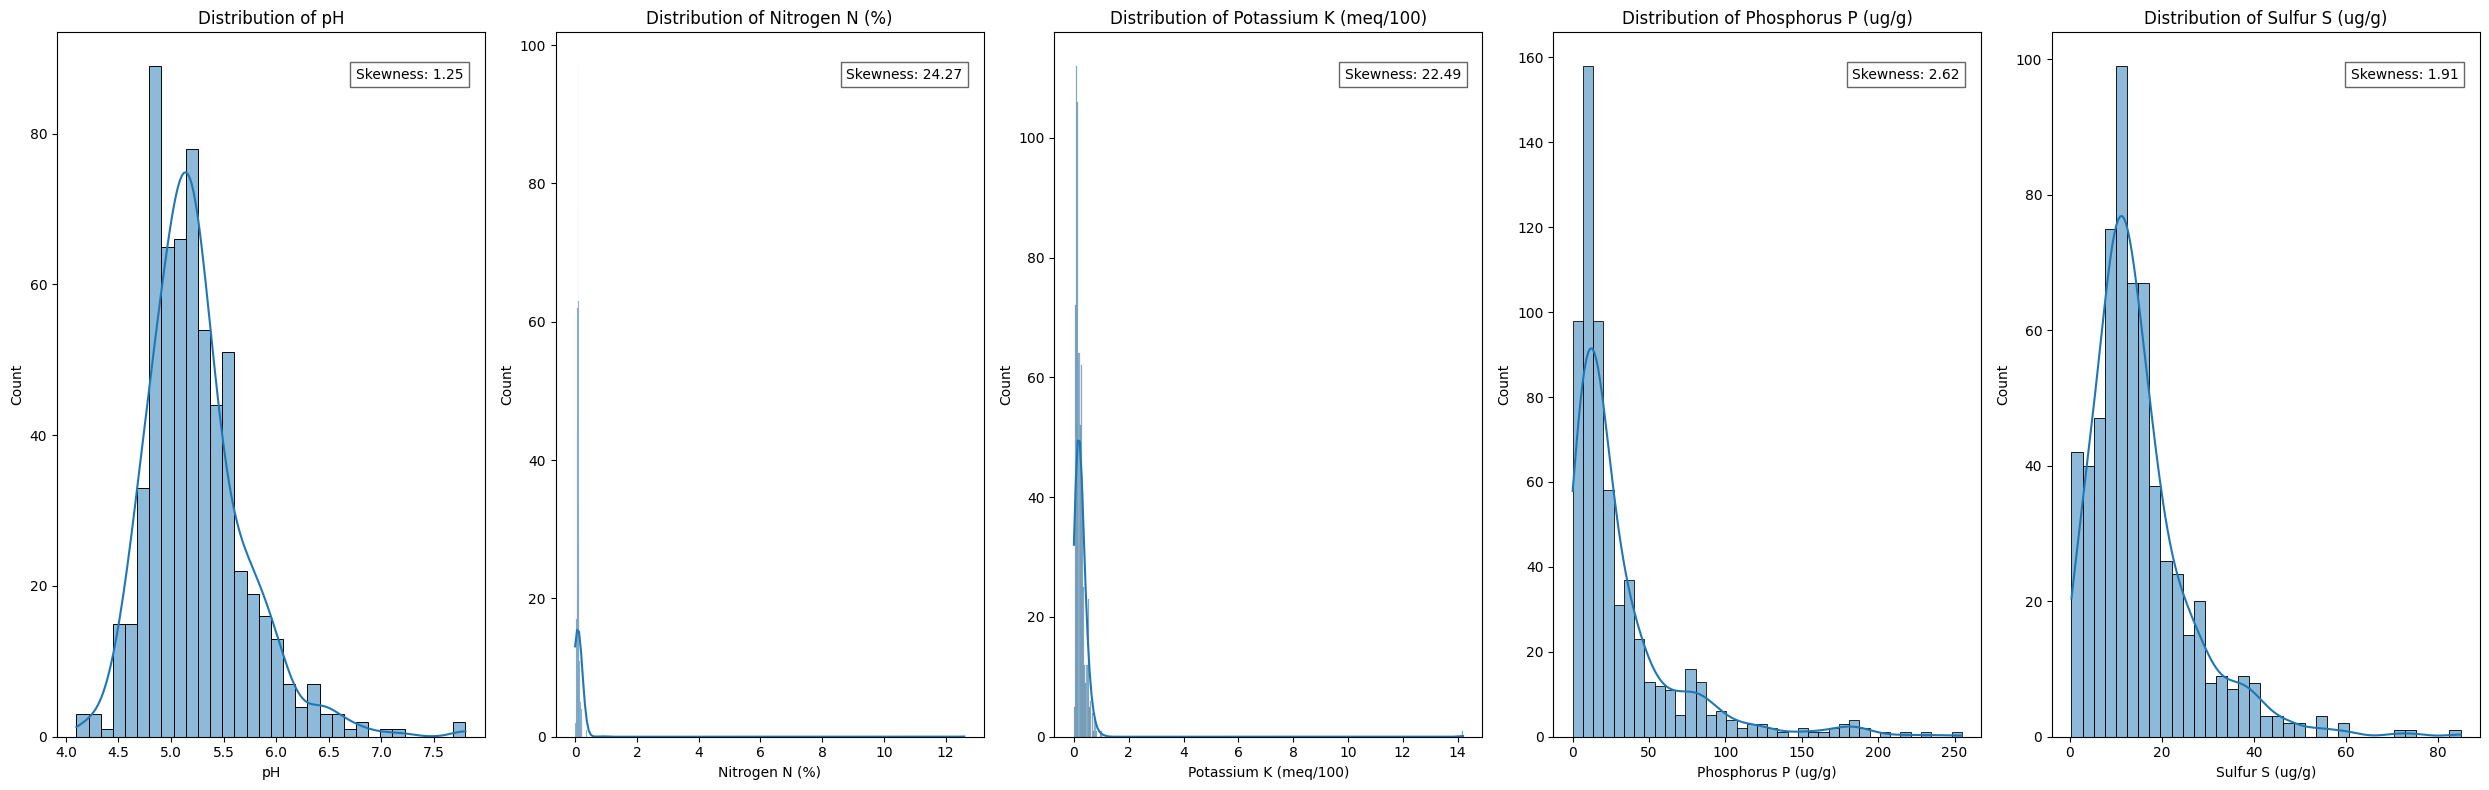

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 8))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

    skew_val = df[col].skew()
    axes[i].text(0.95, 0.95, f'Skewness: {skew_val:.2f}',
                transform=axes[i].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

* **pH** values are mostly around **4.5** to **6.0**, indicating most of the soil are in the range between **very strong acidic** to **medium acidic**. Considering this chart [![pH chart](https://www.pda.org.uk/wp/wp-content/uploads/2015/10/detailed-Truog-pH-chart.jpg)](https://www.pda.org.uk/pda_leaflets/24-soil-analysis-key-to-nutrient-management-planning/soil-p-k-and-mg-concentrations-mgl-and-defra-index-scale/)

* The golden range of **pH** is in between **6 to 7**. In this range, nutrients are the most available.
* So, most nutrients are more soluble in slighly acidic soils than in the neutral or slighly alkaline soil (>7.5)
* The **pH** distribution indicating that the most soils are in the range between acidic to slightly acidic.

* Most soils having the amount of **Nitrogen** is below **0.2%**. Which is highly likely. As because, **98%** of total of the Nitrogen in soil is in organic forms. Most forms of organic nitrogen cannot be taken up by plants.
plants can readily take up mineral forms of nitrogen.  mineral nitrogen in soil accounts for only 2 % of the nitrogen in soil. [source](https://www.soilquality.org.au/factsheets/soil-nitrogen-supply).

    It is also difficult to measure **Nitrogen** in soil, because **Nitrogen** is a mobile element, means it mobiliezes with water. **Nitrate is also the most easily leached of all nutrients, since the soil has almost no capacity to hold it**. [source](https://extension.umaine.edu/gardening/manual/soils/interpreting-soil-tests/)

    A typical agricultural soil in the Willamette Valley
    contains about 0.10 to 0.15 percent N. [source](https://www.canr.msu.edu/foodsystems/uploads/files/soil_test_interpretation.pdf). Although, this is a study of US and on US soil, but having amount of **Nitrogen** in soil below **0.2%** is typical. This may change depending on various factor like, **Temperature**, **Moisture**, **Organic Matters** in the soil.

* **Potassium K** which is measured in (meq/100) is typically low in amount (< 0.4 meq/100g) according to this [study](https://www.canr.msu.edu/foodsystems/uploads/files/soil_test_interpretation.pdf). Indicating defficiency of **K** in soil.

* **Phosphorus** is relatively **immobile** in soil. The don't get washed away or leached like **Nitrogen**. **Phosphorus** is measured in **ug/g** which can be also be interpreted as **ppm**. According to this [study](https://www.canr.msu.edu/foodsystems/uploads/files/soil_test_interpretation.pdf) most of the soil having low to medium amount of **Phosphorus**, as 75% of the observed data are below **40 ug/g**. There are also cases where the **Phosphorus** level is high (40-100) ug/g and excessive (>100) ug/g. **Phosphorus** application is not recommended when the level is high or excessive.

* **Sulfur S** measured in (ug/g) showing diversity ranging from **low** (2 - 5) ug/g amount to **high** (>20) ug/g amount. **75%** of the data are in the **low** to **medium** (5 - 20) range. [source](https://www.canr.msu.edu/foodsystems/uploads/files/soil_test_interpretation.pdf)



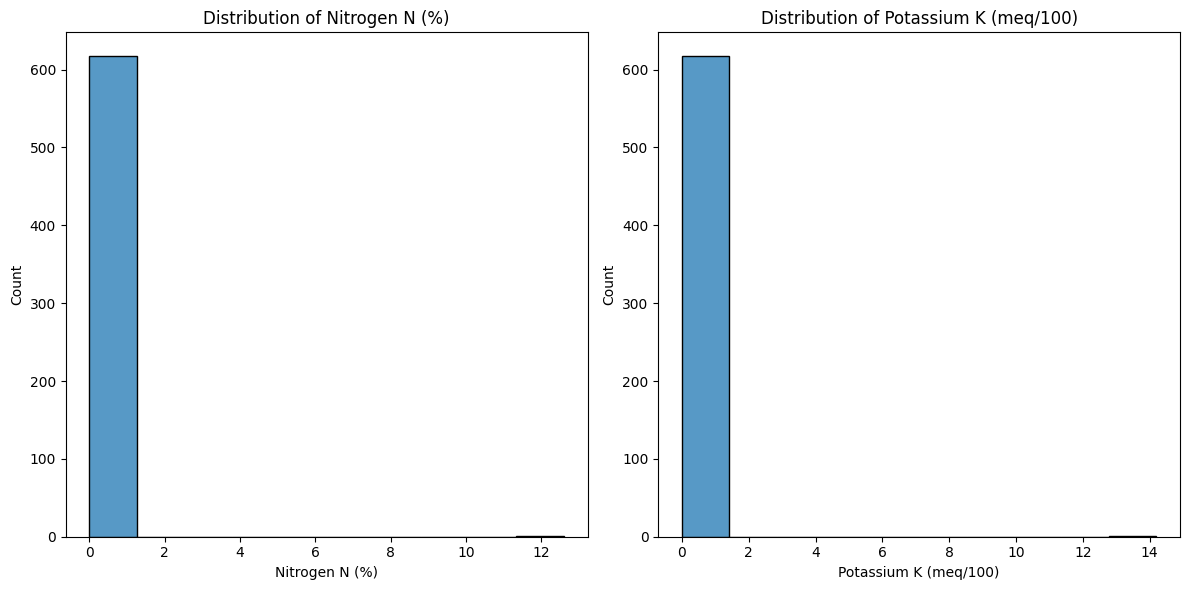

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes = axes.flatten()

for i, col in enumerate(['Nitrogen N (%)', 'Potassium K (meq/100)']):
    sns.histplot(df[col], ax=axes[i], bins=10)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
print(f"Mean value of Nitrogen N (%): {round(df['Nitrogen N (%)'].mean(), 2)}")
print(f"Mean value of Potassium K (meq/100): {round(df['Potassium K (meq/100)'].mean(), 2)}")

Mean value of Nitrogen N (%): 0.11
Mean value of Potassium K (meq/100): 0.24


In [ ]:
print(f"90 percentile of Nitrogen N (%): {round(df['Nitrogen N (%)'].quantile(0.9), 2)}")
print(f"90 percentile of Potassium K (meq/100): {round(df['Potassium K (meq/100)'].quantile(0.9), 2)}")

90 percentile of Nitrogen N (%): 0.14
90 percentile of Potassium K (meq/100): 0.43


In [ ]:
df.loc[(df['Nitrogen N (%)'] > 1) & (df['Potassium K (meq/100)'] > 1)]

,Area,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
350,Pirgacha,Alluvial soil of Teesta,Medium high land,loam,6.0,1.26,12.6,14.2,0.26,0.4,0.35,0.35


* It's clear that there are some really extreme value(s) in **Nitrogen N** and **Potassium K**
* The mean of **N** and **K** is around **0.11** and **0.24** respectively, and if you look at the 95th percentile of the both variable, they are around **0.14** and **0.43** which belongs to a normally distributed data
* In both the cases there is one observation where the **N** and **K** exceeds value greater than 1

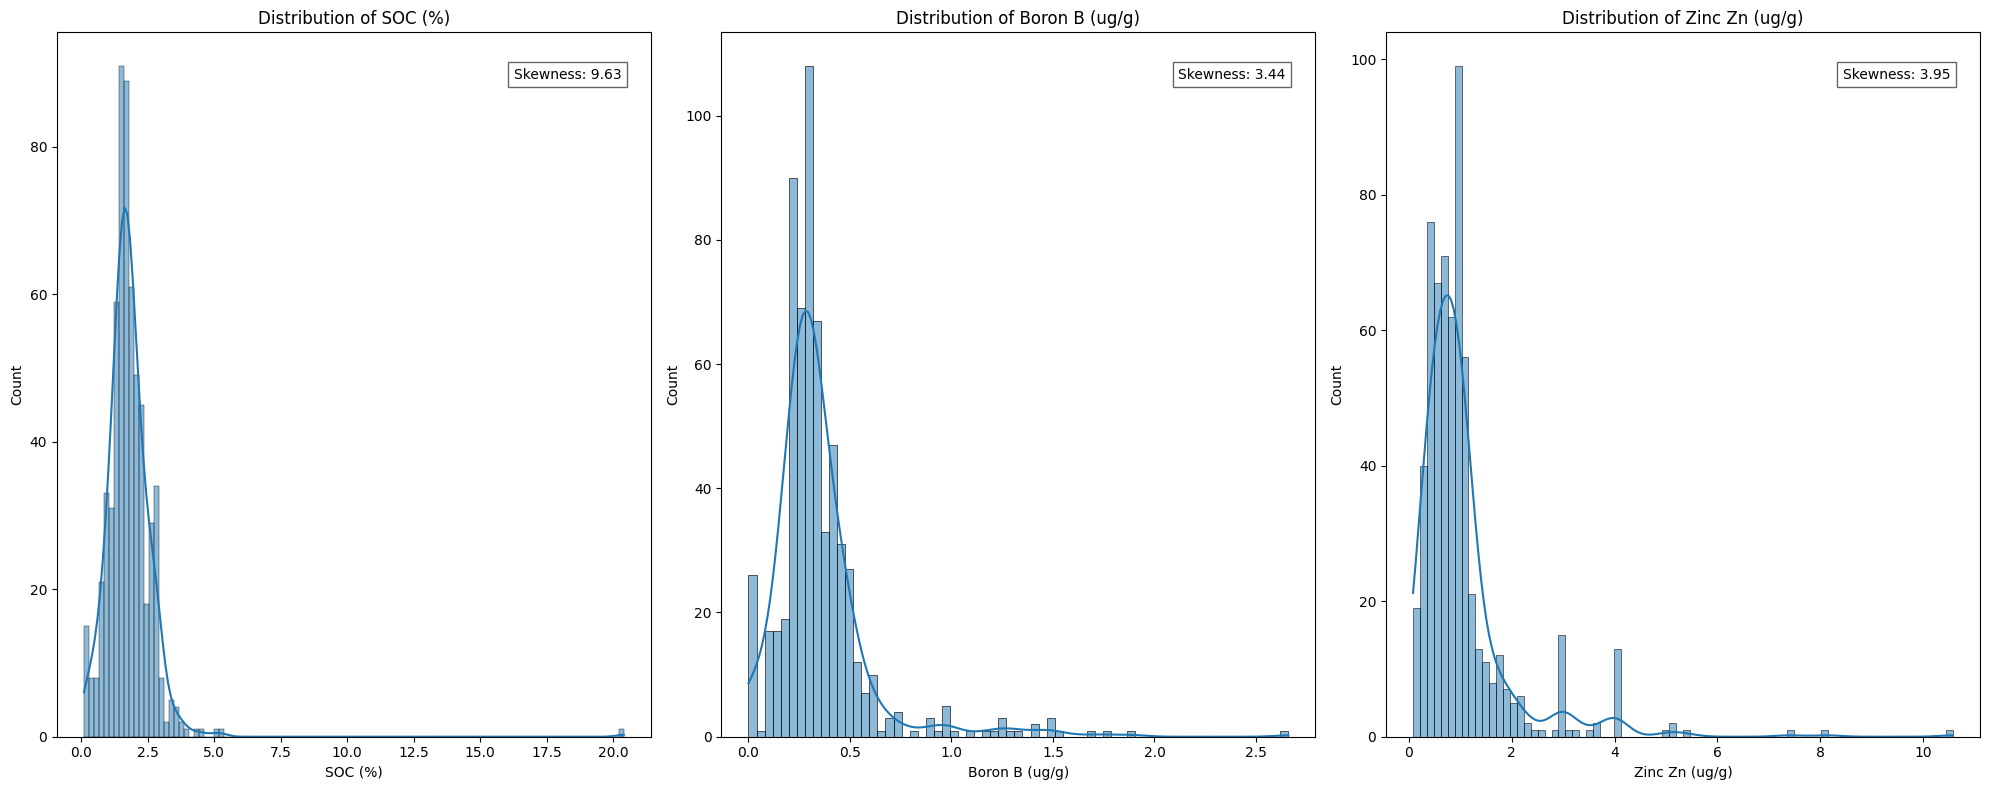

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes = axes.flatten()

for i, col in enumerate(target_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

    skew_val = df[col].skew()
    axes[i].text(0.95, 0.95, f'Skewness: {skew_val:.2f}',
                transform=axes[i].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

**Micronutrients**

Deficiencies of micronutrients other than **Boron** and **Zinc** are uncommon.The availability of most micronutrients **decreases as** **pH** increases. [source](https://www.canr.msu.edu/foodsystems/uploads/files/soil_test_interpretation.pdf)

* **Boron B** measured in (ug/g) is mostly around the range between (0.2 - 0.4) which is considered **low** and few are in the range between (0.41 - 1) which is considered **medium**. Amount of **Boron** >2 (ug/g) is considered as **excessive**. While low levels of Boron may limit plant growth,
high concentrations can be toxic. [source](https://www.canr.msu.edu/foodsystems/uploads/files/soil_test_interpretation.pdf)
    

* **Zinc Zn** measured in (ug/g). According to [source](https://www.canr.msu.edu/foodsystems/uploads/files/soil_test_interpretation.pdf) A zinc soil test above 1.5 ppm or (ug/g) is sufficient for most crops. The **Zinc** ranges between mostly (0.1 - 1.1) ug/g. Which could be an indication of deficiency.

**Soil Organic Carbon (SOC)**

Soil organic matter (OM) is a surrogate for **soil carbon** and is measured as a reflection of overall **soil health**. When monitored for several years, it gives an indication whether soil quality is improving or degrading.  As OM increases, so does the ability to absorb and reduce effectiveness
of many soil-applied herbicides. So, increase in SOC is typically and indication of improvement of the soil.

* Most values of **SOC** falls under the range between **0.5%** to **2.5%**

## Histogramp based on land type

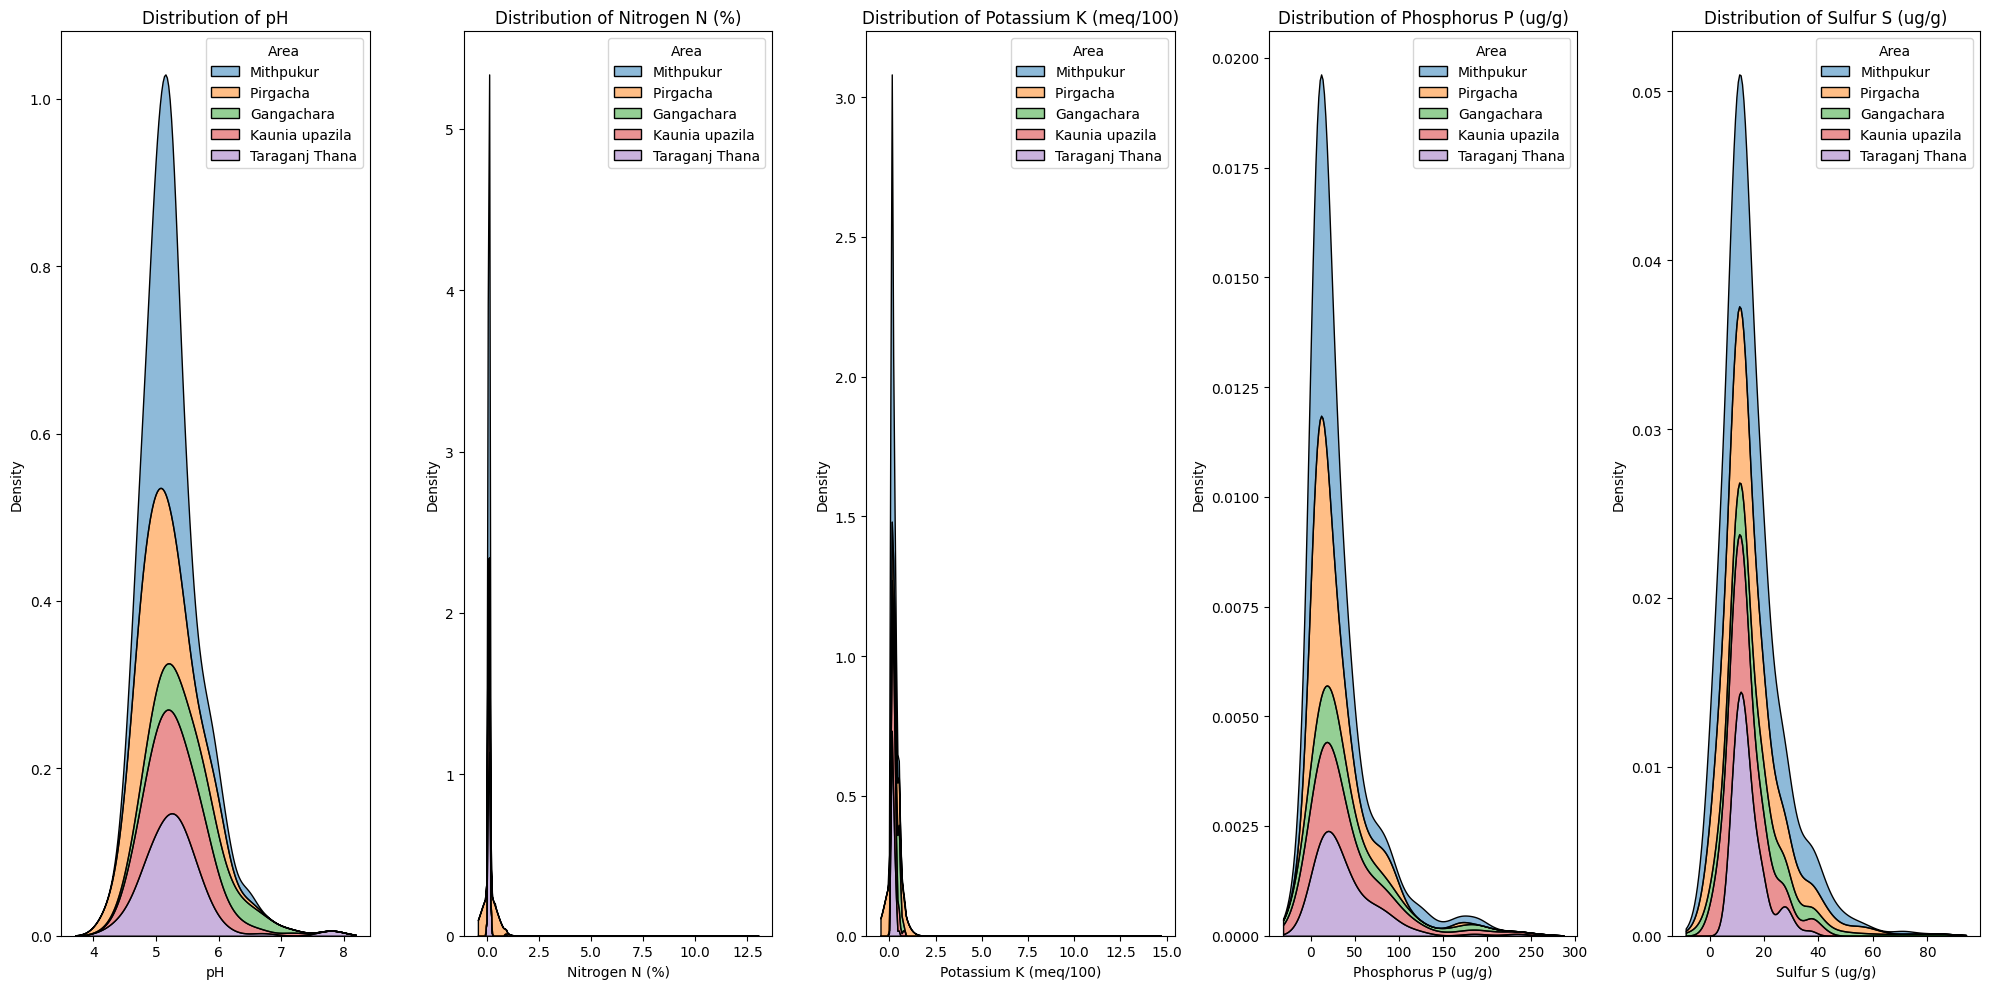

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df,
                x=col,
                ax=axes[i],
                hue='Area',
                # fill=True,
                palette='tab10',
                alpha=.5,
                multiple='stack')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

* Apart from **N**, **K** which had really extreme values the other numerical variables are more or less well distributed in different regions, even though there are not that much information from some of the regions.

* **Phosphorus P** (ug/g) having a right tail indicates that there are some extreme values and it appears that these values are coming from most of the regions. Excessive amount of **Phosphorus** is not good for crop's health


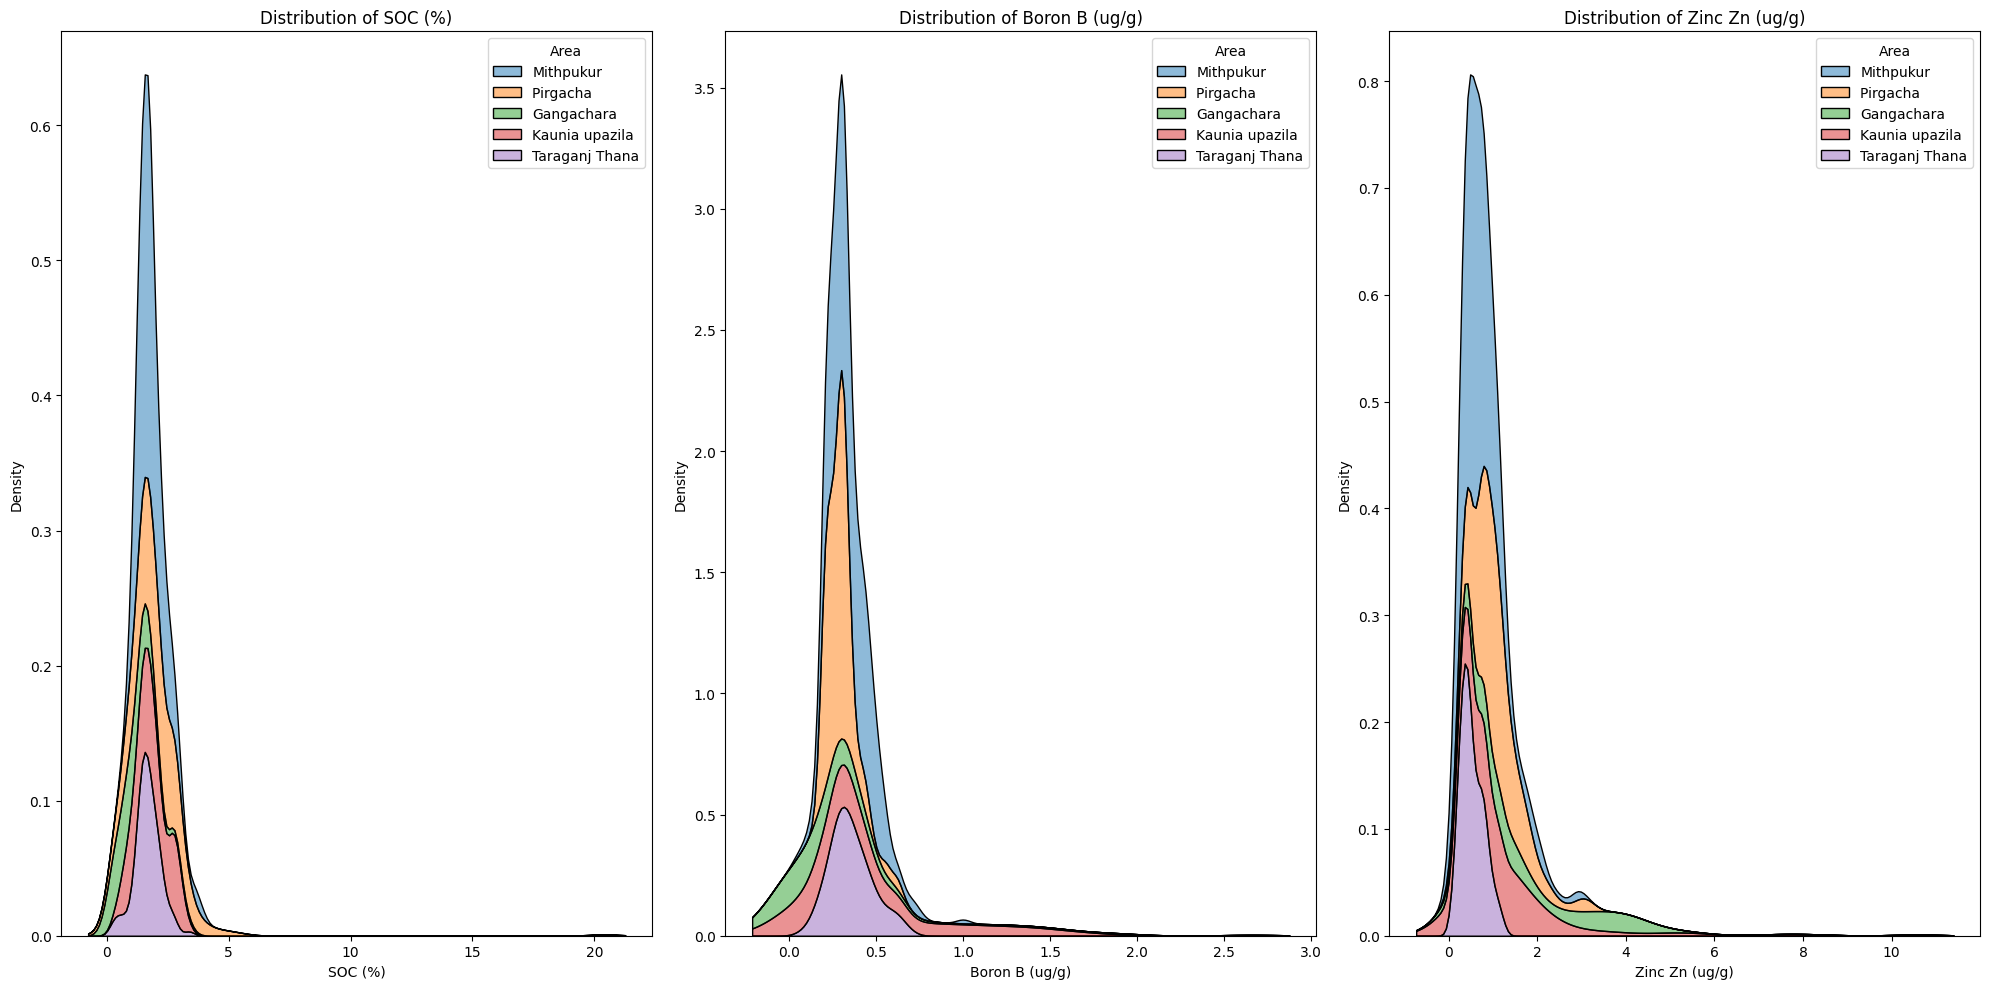

In [ ]:
# Distribution of the target variables

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(target_cols):
    sns.kdeplot(data=df,
                x=col,
                ax=axes[i],
                hue='Area',
                # fill=True,
                palette='tab10',
                alpha=.5,
                multiple='stack')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

* **Tharaganj thana** having the lowest amount of **SOC**, **Boron** as well as **Zinc**.

* All the other region spans out a little more. But most of the values fall unde the range of **Low** to **Medium**
* This indicates defficiency in **Boron** as well as in **Zinc**

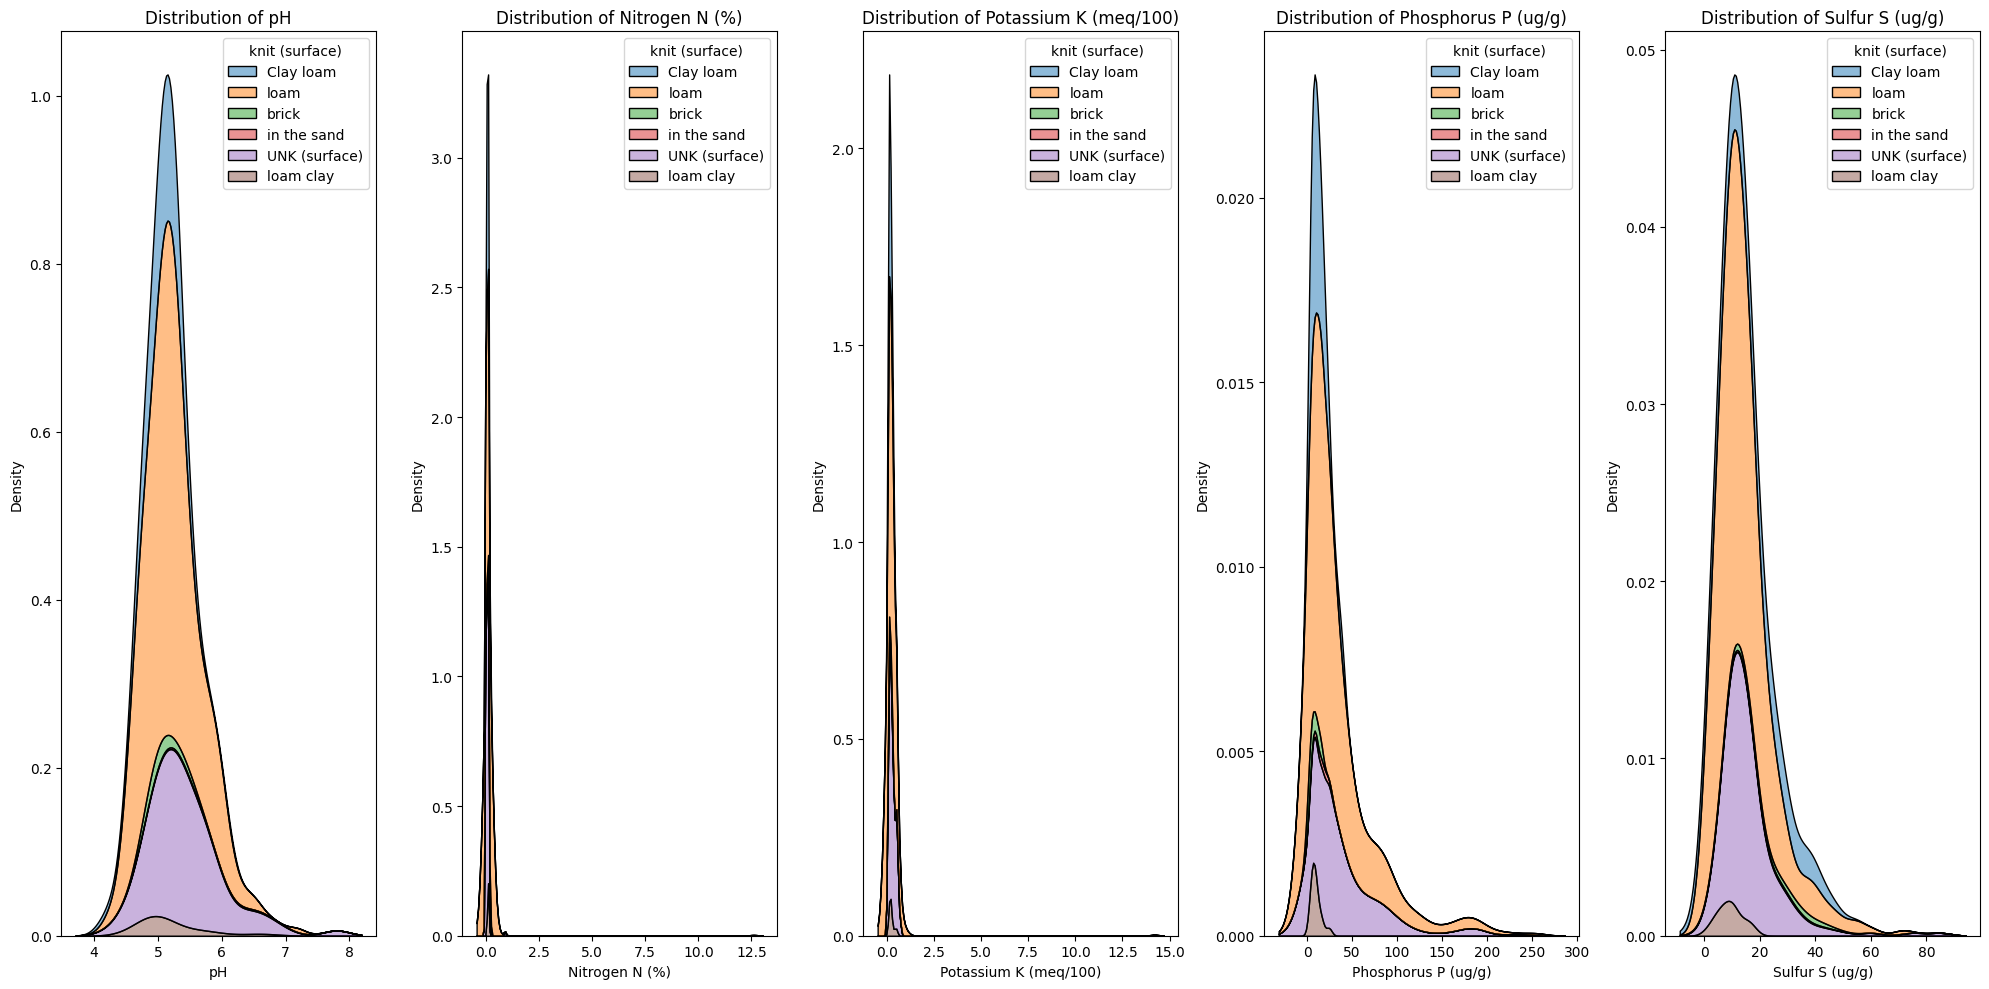

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df,
                x=col,
                ax=axes[i],
                hue='knit (surface)',
                # fill=True,
                palette='tab10',
                alpha=.5,
                warn_singular=False,
                multiple='stack')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

* **pH** distribution for every **knit (surface)** is more or less normal.
* **Loam Clay** even though with **15** observation having a pretty spread out distribution.
* **Loam** which has very spread out **pH** values also having very spread out **Phosphours** values as well as **Sulphur**
* **Loam Clay** having the lowest range of values of **N**, **P**, **K** and **Sulfur**. Indicating poor nutrients abundance.

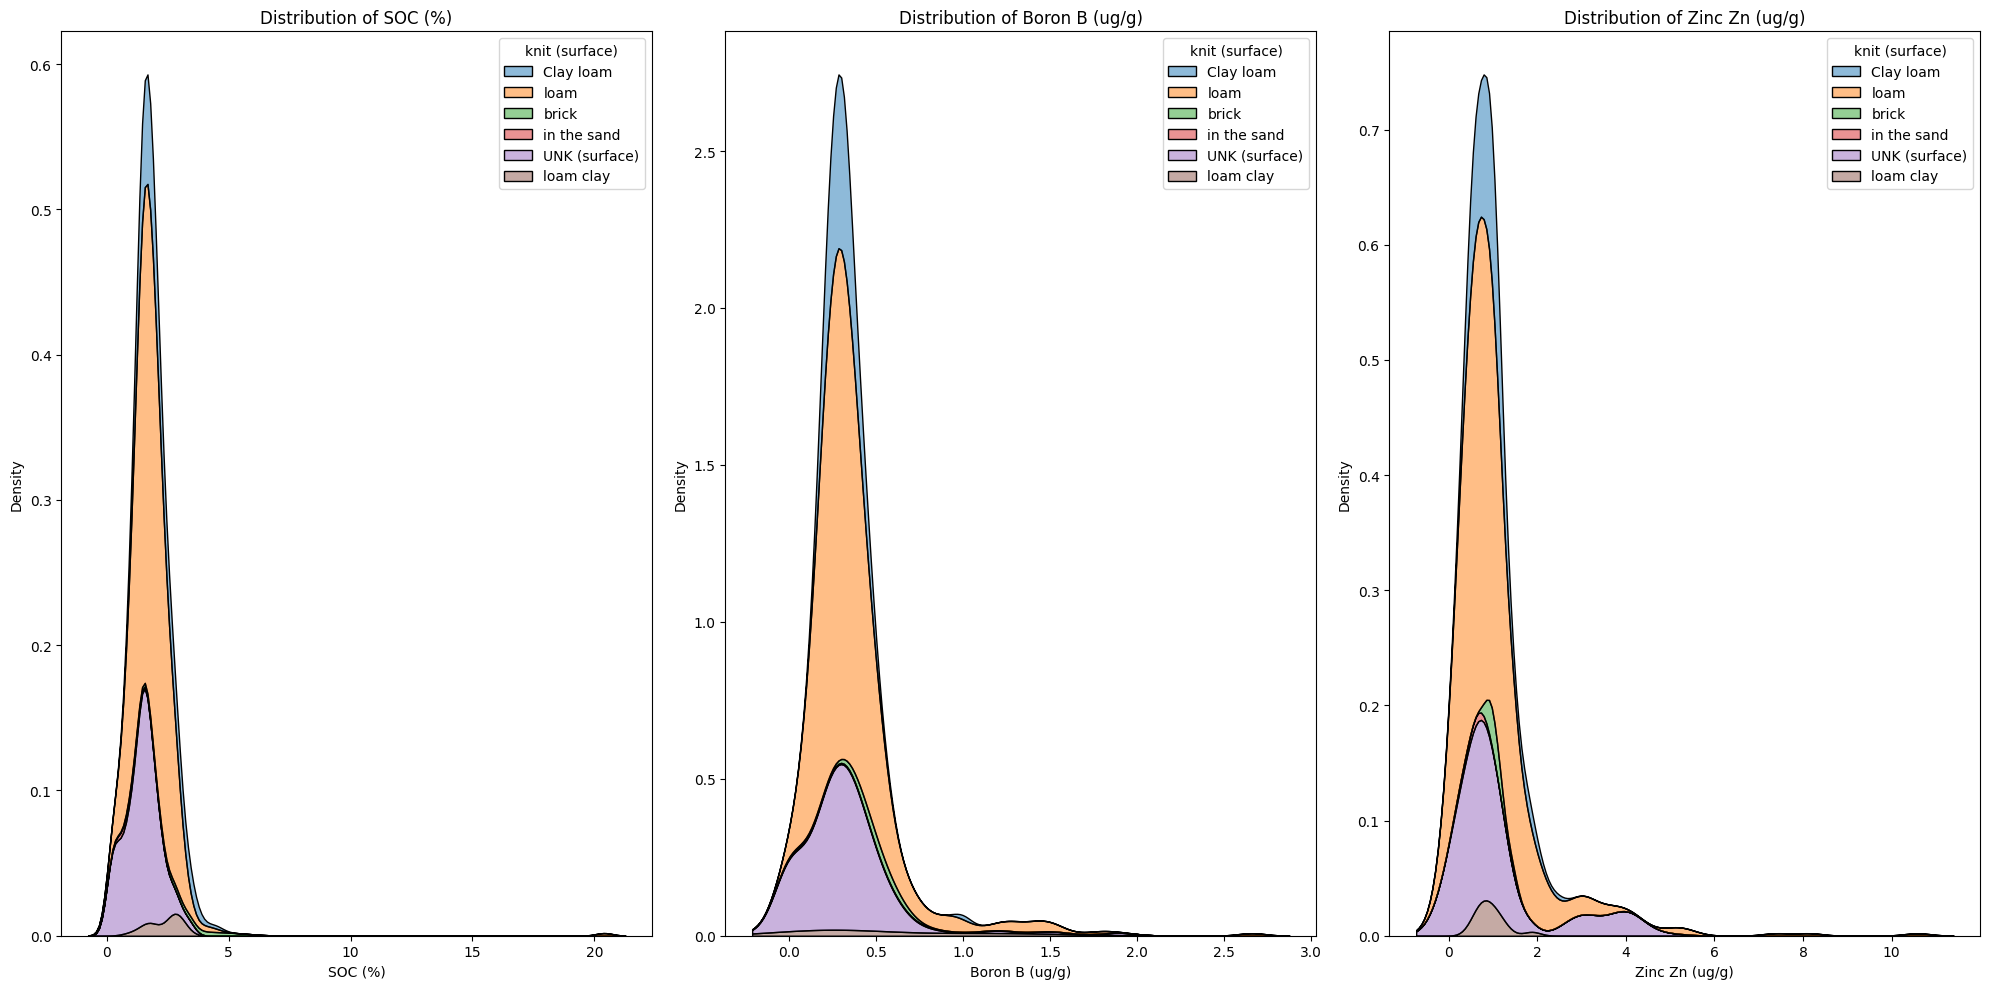

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(target_cols):
    sns.kdeplot(data=df,
                x=col,
                ax=axes[i],
                hue='knit (surface)',
                # fill=True,
                palette='tab10',
                alpha=.5,
                warn_singular=False,
                multiple='stack')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

* As we've seen with the other nutrients, abundance of Micronutrients are also poor in **Loam Clay** soil while other type of soil haivng more or lesst normally distributed micronutrients.
* Though, **brick** and **in the sand** type of soil having very few observation. It's early to say that they have normally distributed nutrients.

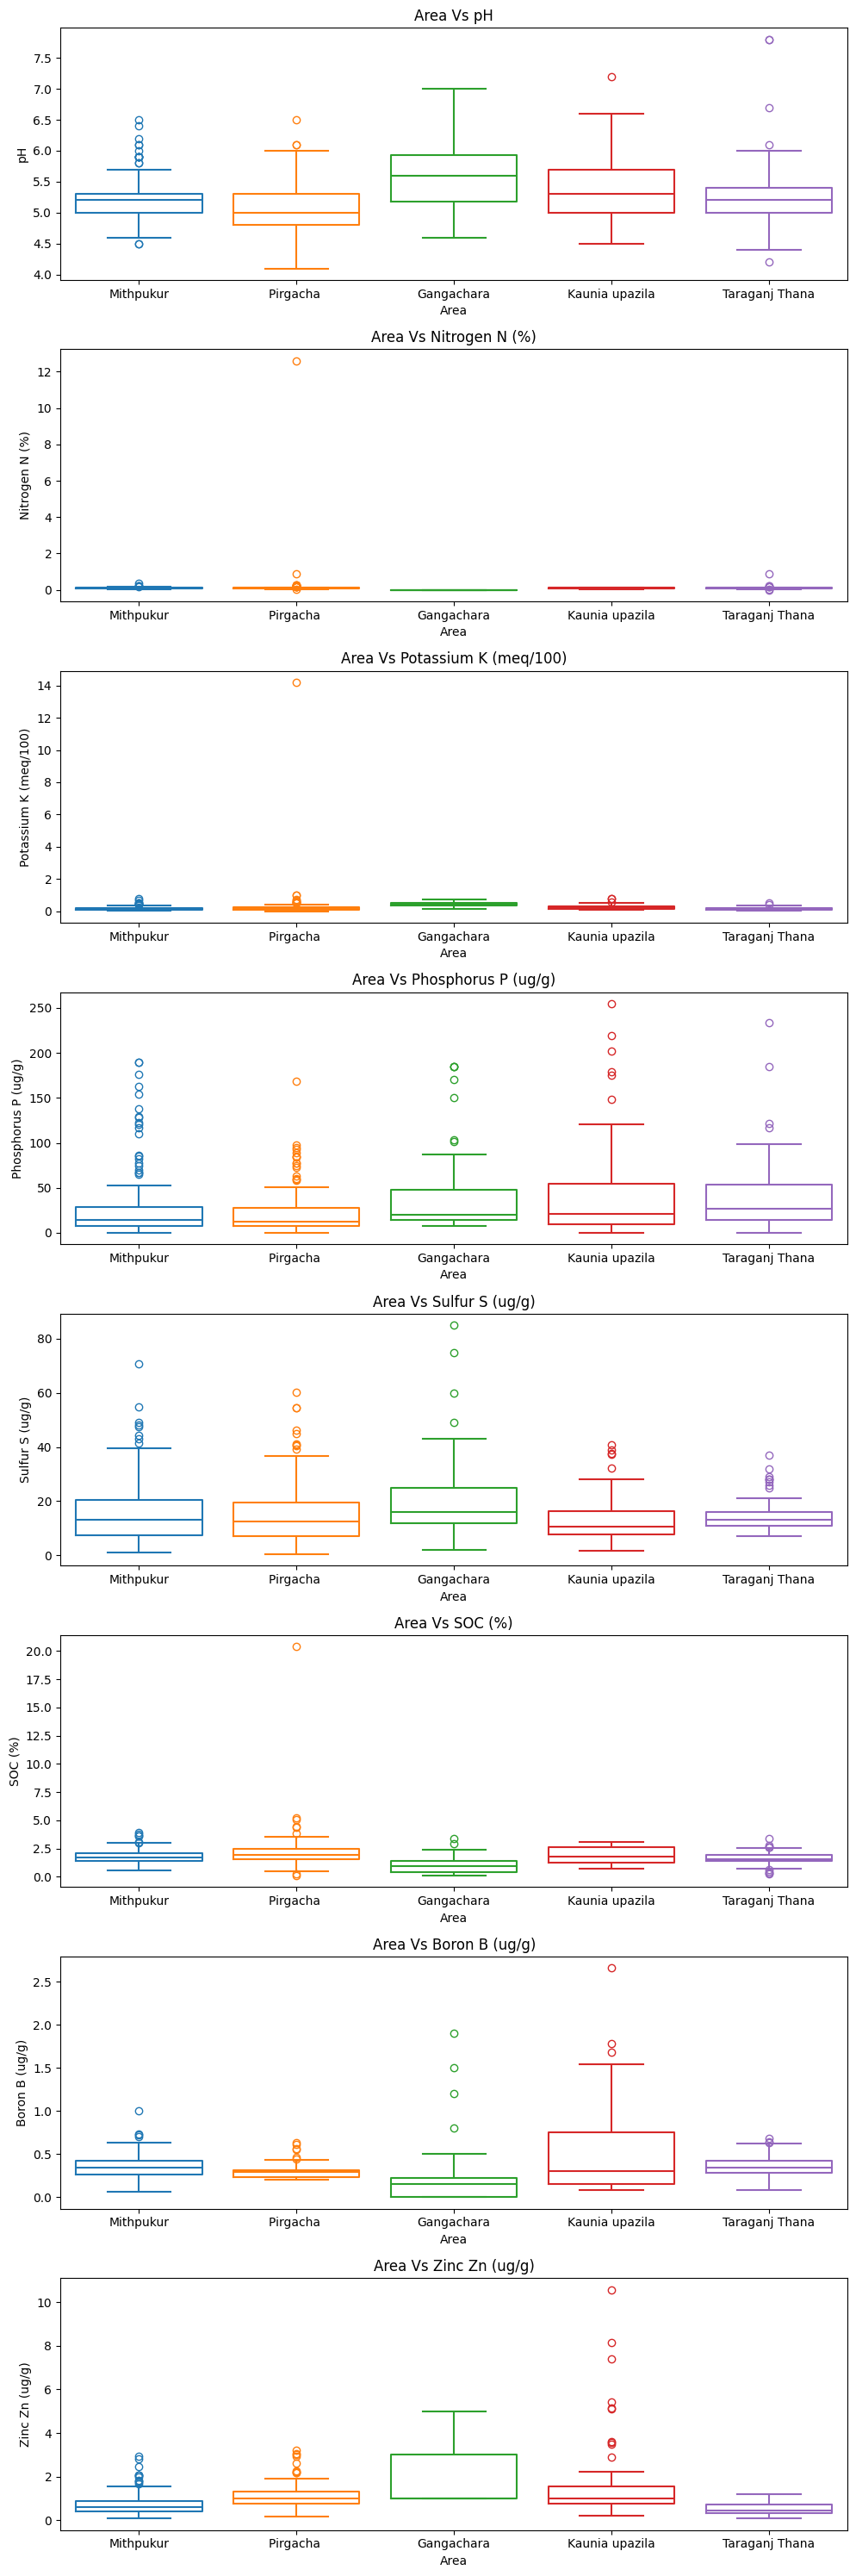

In [ ]:
fig, axes = plt.subplots(len(num_cols + target_cols), 1, figsize=(10, 30))

axes = axes.flatten()

for i, col in enumerate(num_cols + target_cols):
    sns.boxplot(data=df,
                x='Area',
                y=col,
                ax=axes[i],
                hue='Area',
                fill=False,
                palette='tab10',
                legend=False,
                # alpha=.5,
                # warn_singular=False,
                # multiple='stack'
                )
    axes[i].set_title(f'Area Vs {col}')
    # axes[i].tick_params(axis='x', labelrotation=30)

plt.tight_layout()
plt.show()

* **Gangachara** having the most good amount of Primary Micronutrients and secondary micronutrients values, But lack of **Boron** exists as well as the **SOC**.

* **Gangachara** having high **pH** values and low **SOC** values. With high **pH** values **OM** builds up slowly. Also increase in **pH** also lowers micronutrients. **Boron** in **Gangachara** is also too low than the other places.



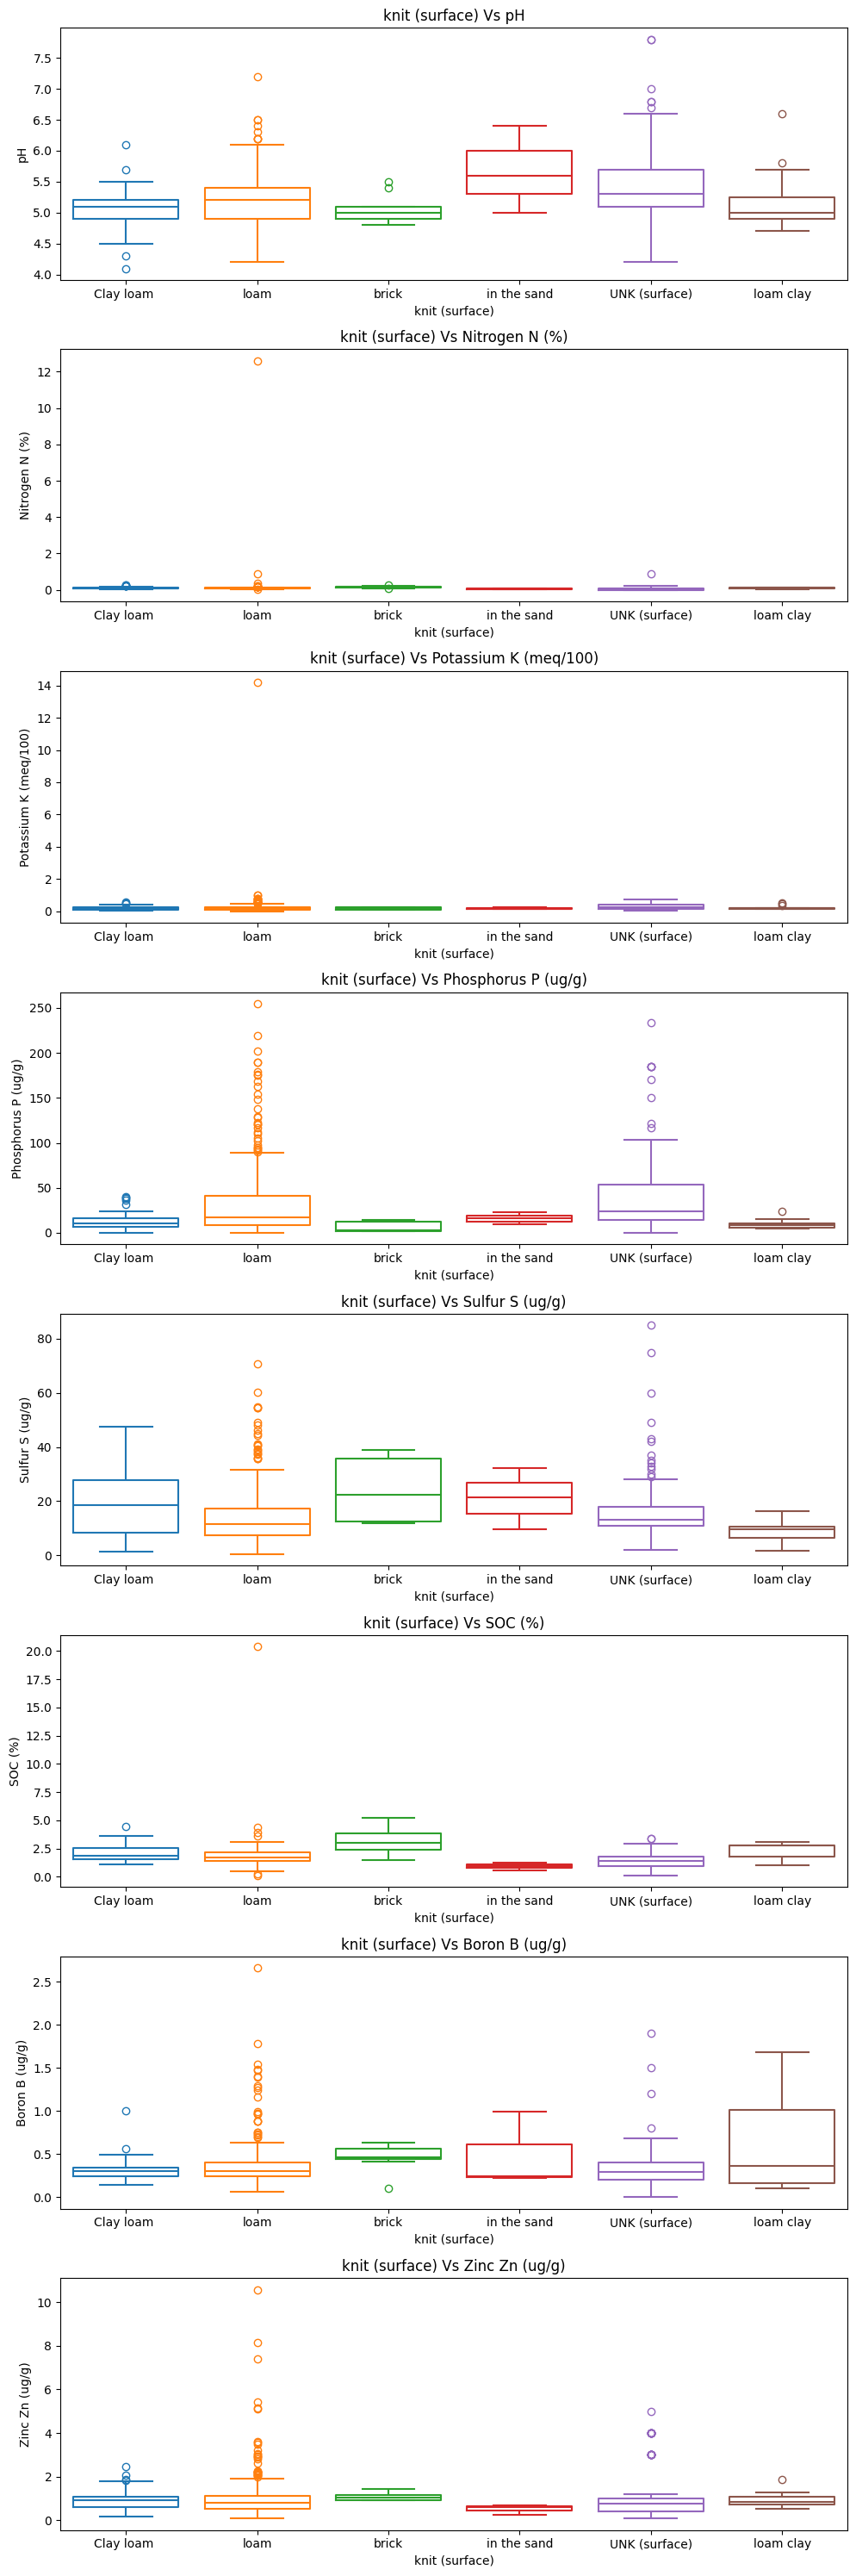

In [ ]:
fig, axes = plt.subplots(len(num_cols + target_cols), 1, figsize=(10, 30))

axes = axes.flatten()

for i, col in enumerate(num_cols + target_cols):
    sns.boxplot(data=df,
                x='knit (surface)',
                y=col,
                ax=axes[i],
                hue='knit (surface)',
                fill=False,
                palette='tab10',
                legend=False,
                # alpha=.5,
                # warn_singular=False,
                # multiple='stack'
                )
    axes[i].set_title(f'knit (surface) Vs {col}')
    # axes[i].tick_params(axis='x', labelrotation=30)

plt.tight_layout()
plt.show()

* **In the sand** and **UNK (surface) having the highest **pH** values

* **Nitrogen N**, **Potassium K** and **Phosphorus P** are lower in amount in **in the sand** type of soil and **Loam** type soil having most of the extreme values.

* **Sulfur S** is quite abundant in **Brick**, **in the sand** and **clay loam** types soil

* Lower amount of **SOC** is visible in **in the sand**, this could be a fact that, **in the sand** had much higher **pH** values.

* **Boron B** and **Zinc Zn** are most abundant in **Brick** type of soil

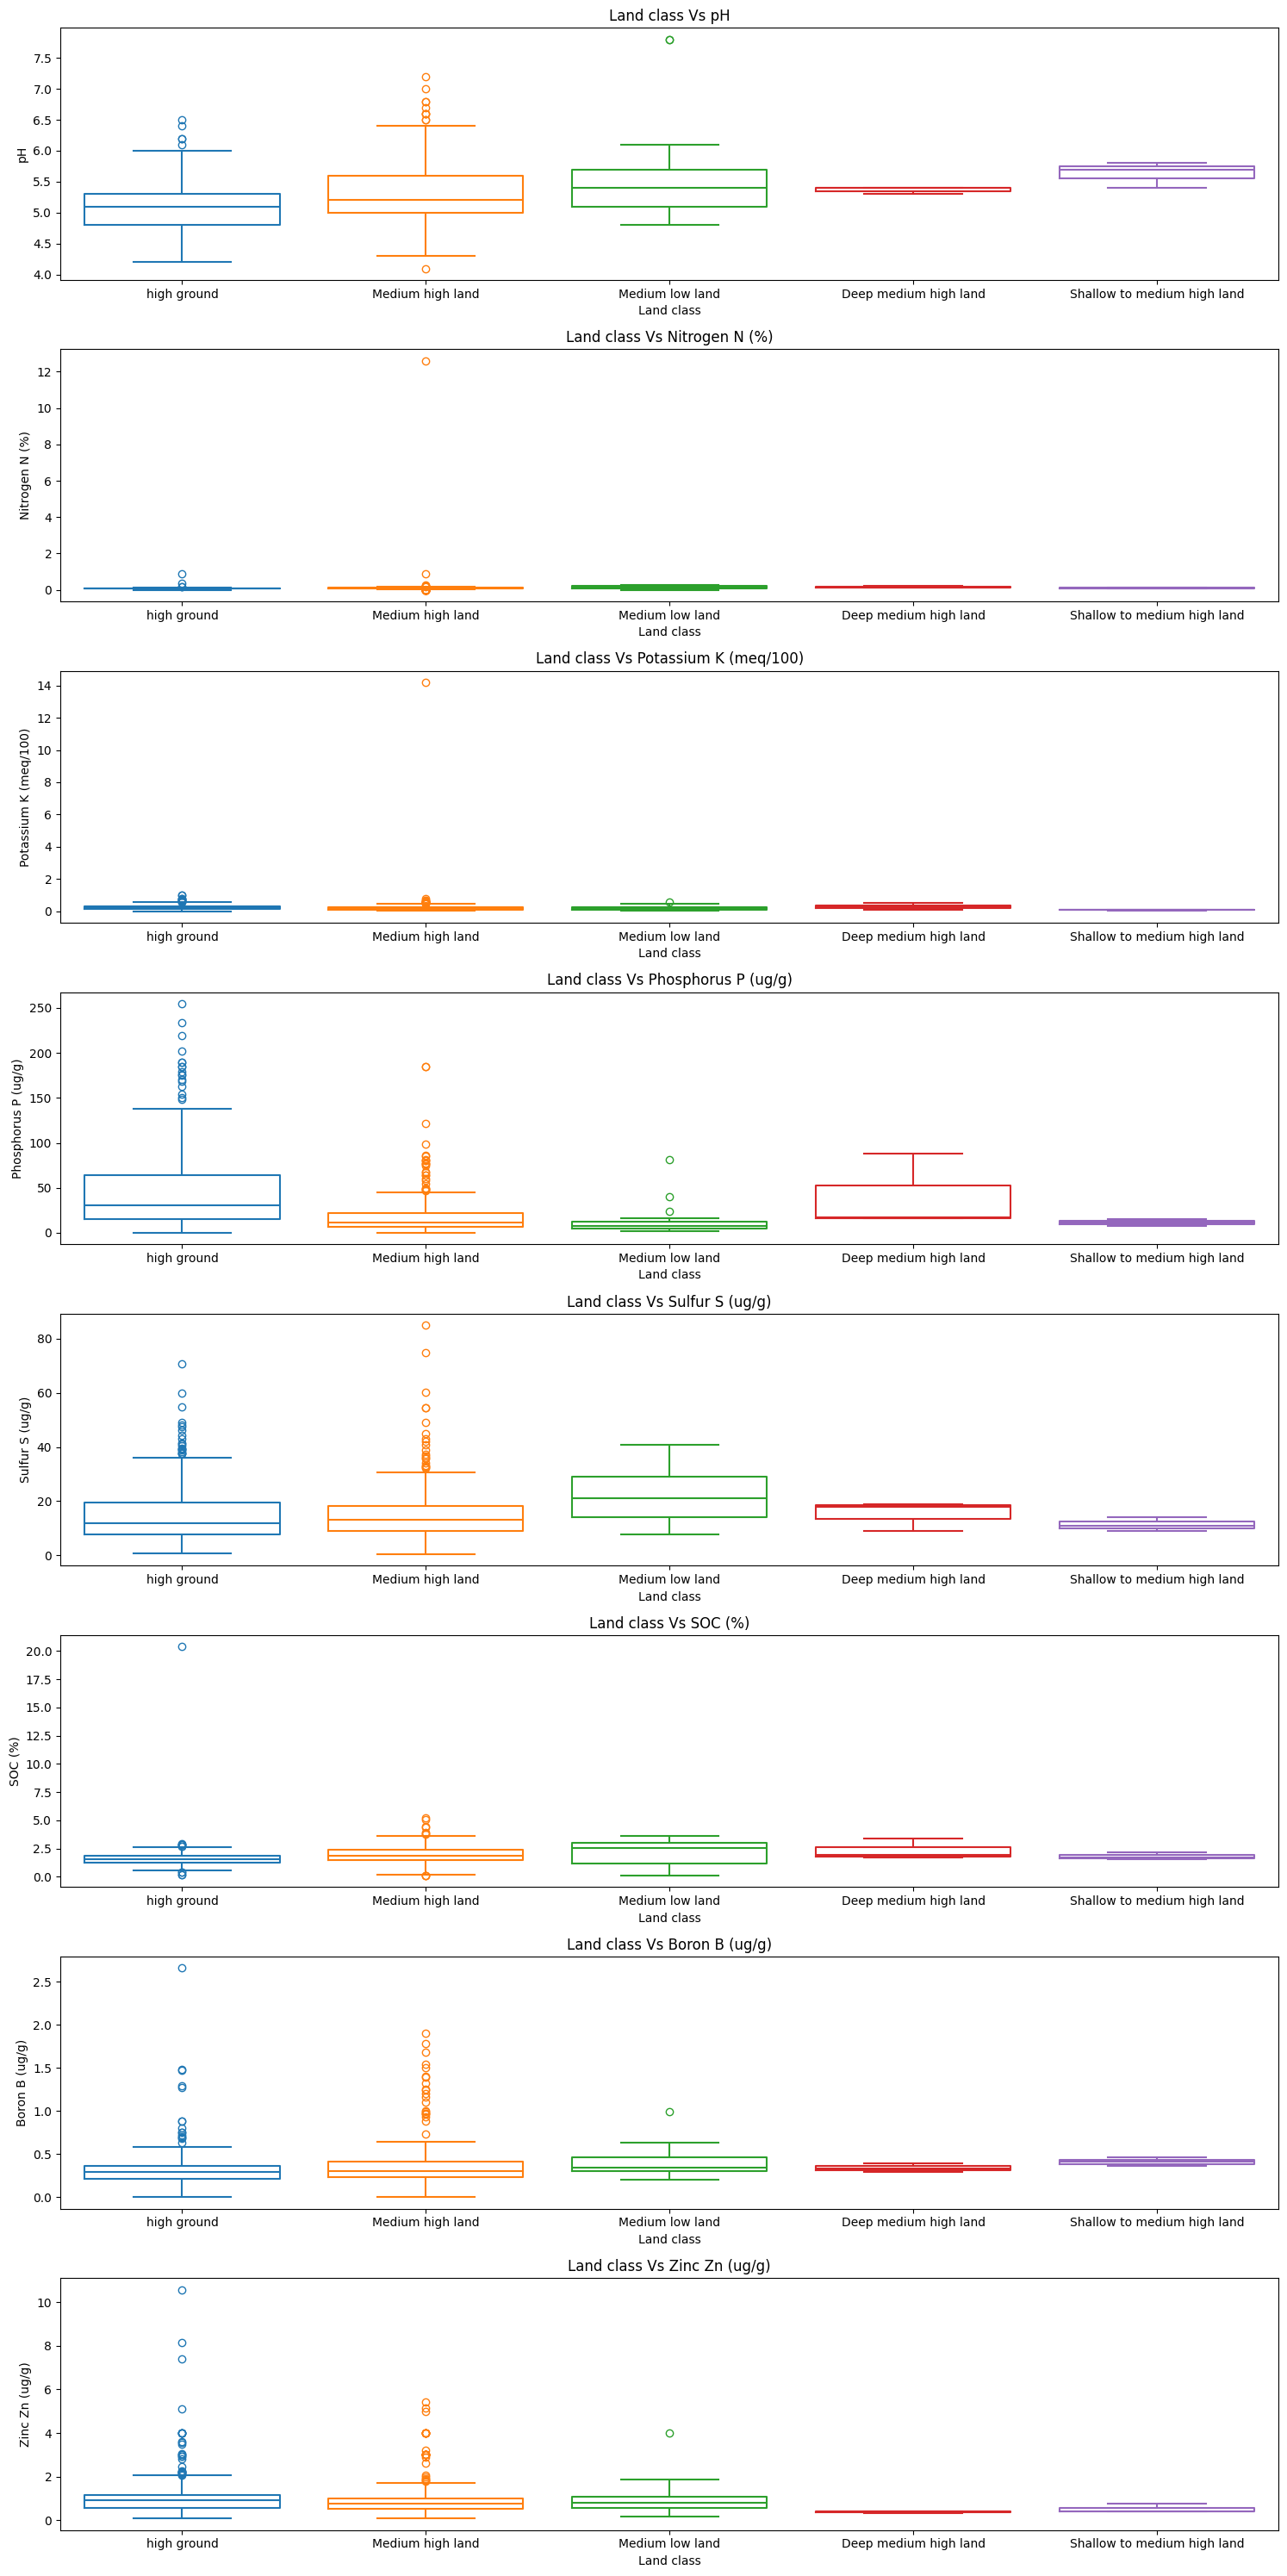

In [ ]:
fig, axes = plt.subplots(len(num_cols + target_cols), 1, figsize=(15, 30))

axes = axes.flatten()

for i, col in enumerate(num_cols + target_cols):
    sns.boxplot(data=df,
                x='Land class',
                y=col,
                ax=axes[i],
                hue='Land class',
                fill=False,
                palette='tab10',
                legend=False,
                # alpha=.5,
                # warn_singular=False,
                # multiple='stack'
                )
    axes[i].set_title(f'Land class Vs {col}')
    # axes[i].tick_params(axis='x', labelrotation=30)

plt.tight_layout()
plt.show()

* With high amount of **pH** the **shallow to medium high land** also has low amount of **Nitrogen**, **Phosphorus**, **Potassium** and **Sulfur**.

* The **shallow to medium high land** also has slightly less amount of **SOC**, **Zinc** and high amount **Boron**

# Pairplot (Correlation plot)

In [ ]:
def scatter_plot(df, x_col, y_col, ax_id=None, hue=None, figsize=(8, 6), palette=None):
    plt.figure(figsize=figsize)
    with sns.axes_style("darkgrid"):
        ax = sns.scatterplot(data=df,
                            x=x_col,
                            y=y_col,
                            ax=axes[ax_id] if ax_id else None,
                            hue=hue,
                            palette=palette)
        plt.title(f'Scatter Plot [{x_col} vs {y_col}]')
        plt.tight_layout()
        plt.show()

# plt.figure(figsize=(20, 8))
# sns.pairplot(df[[target_cols[0]] + num_cols], corner=True)
# plt.show()

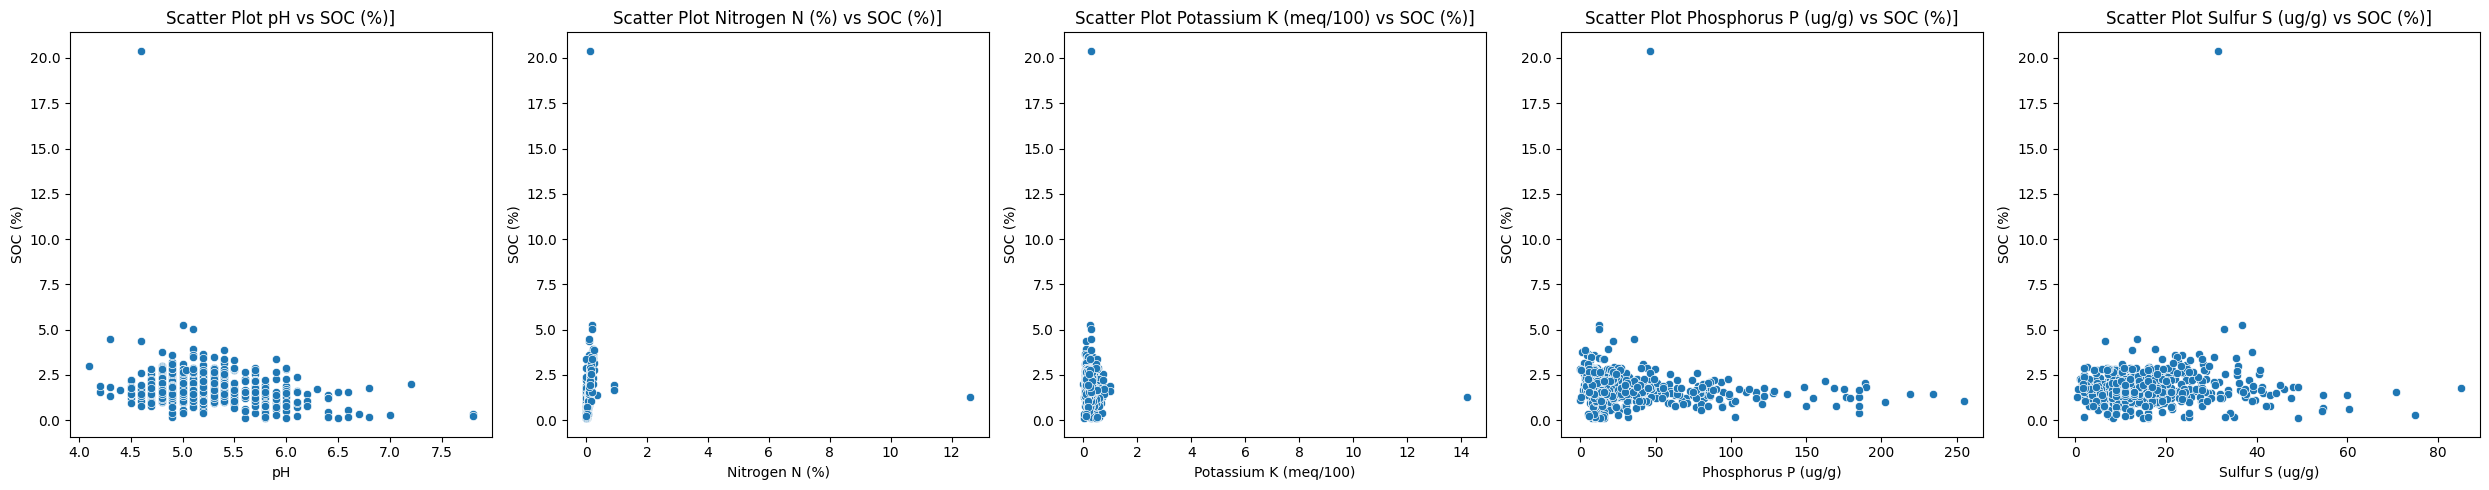

In [ ]:
y_col = target_cols[0]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(data=df,
                    x=col,
                    y=y_col,
                    ax=axes[i])
    axes[i].set_title(f'Scatter Plot {col} vs {y_col}]')

plt.tight_layout()
plt.show()


* Looking at the scatter plot of **SOC** vs Numerical features, there are outliers or extreme values in each of the features.
* **N**, **K**, **pH** are slightly correlated with **SOC** and not that much of a relation with other numerical variables

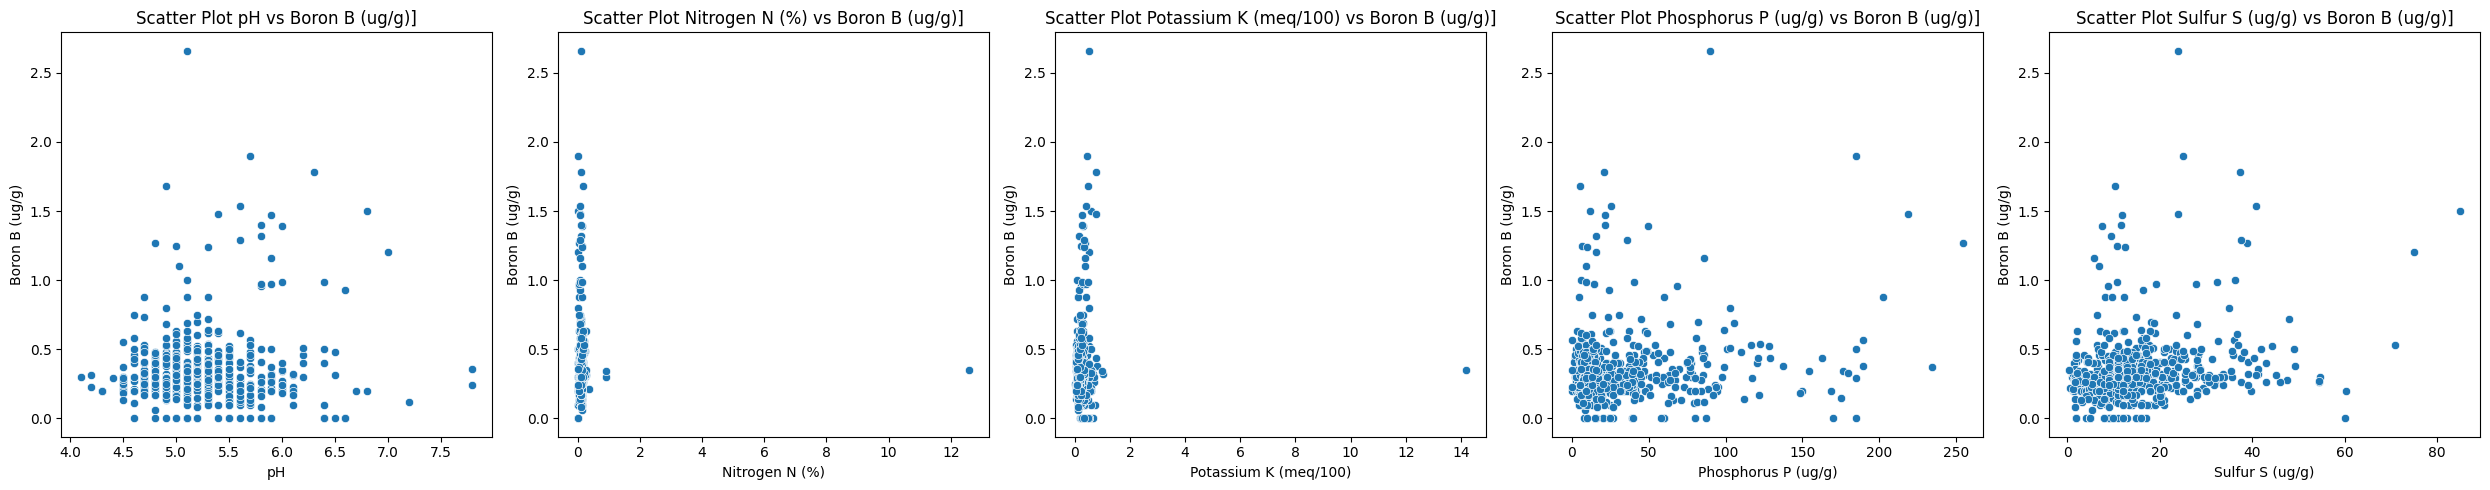

In [ ]:
y_col = target_cols[1]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(data=df,
                    x=col,
                    y=y_col,
                    ax=axes[i])
    axes[i].set_title(f'Scatter Plot {col} vs {y_col}]')

plt.tight_layout()
plt.show()



* Boron looks more correleted with **pH**, **P** and **S**, and slight correlation with **K**

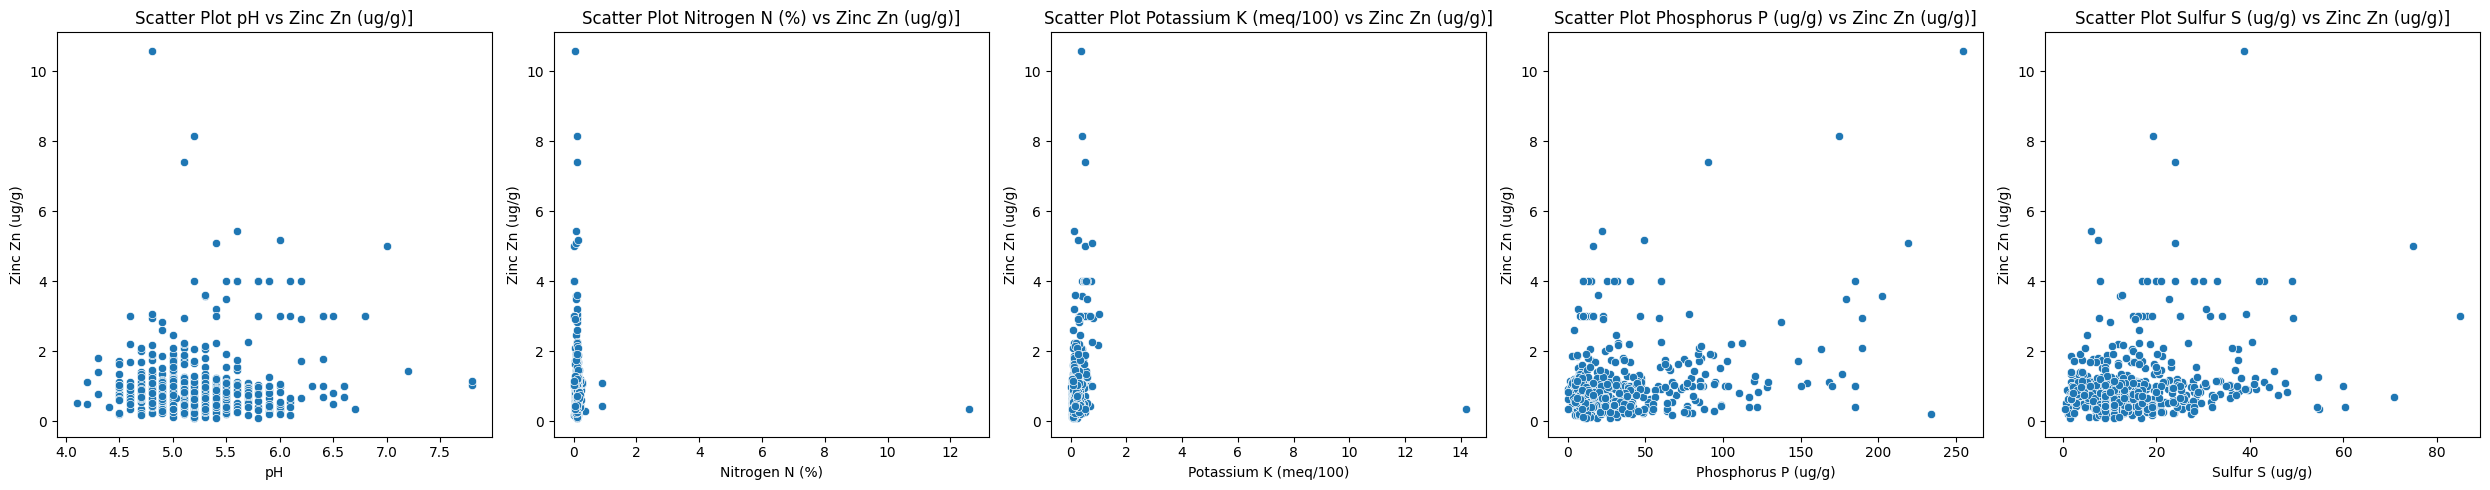

In [ ]:
y_col = target_cols[2]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(data=df,
                    x=col,
                    y=y_col,
                    ax=axes[i])
    axes[i].set_title(f'Scatter Plot {col} vs {y_col}]')

plt.tight_layout()
plt.show()


* **Zinc** is also more correlated with **pH**, **P** and **S** while slightly correlated with **K**

# Heatmaps

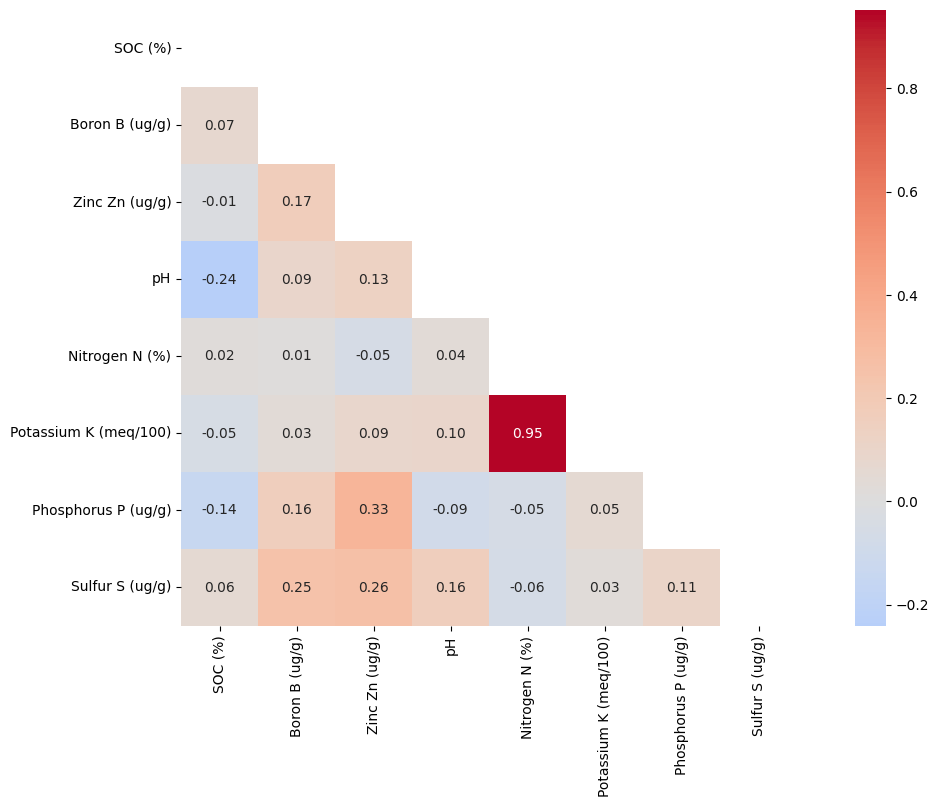

In [ ]:
corr =  df[target_cols + num_cols].corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
# cmap = sns.diverging_palette(100, 7, s=75, l=40,
#                             n=5, center="light", as_cmap=True)

plt.figure(figsize=(15, 8))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='coolwarm')

plt.show()

# P-value and correlation between target variables vs other numerical features

In [ ]:
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns

def corr_full(df, numeric_only=True, rows=['corr', 'p-value', 'obs']):
    """
    Generates a correlation matrix with correlation coefficients,
    p-values, and observation count.

    Args:
    - df:                  Input dataframe
    - numeric_only (bool): Whether to consider only numeric columns for
                           correlation. Default is True.
    - rows:                Determines the information to show.
                           Default is ['corr', 'p-value', 'obs'].

    Returns:
    - formatted_table: The correlation matrix with the specified rows.
    """

    # Calculate Pearson correlation coefficients
    corr_matrix = df.corr(
        numeric_only=numeric_only)

    # Calculate the p-values using scipy's pearsonr
    pvalue_matrix = df.corr(
        numeric_only=numeric_only,
        method=lambda x, y: pearsonr(x, y)[1])

    # Calculate the non-null observation count for each column
    obs_count = df.apply(lambda x: x.notnull().sum())

    # Calculate observation count for each pair of columns
    obs_matrix = pd.DataFrame(
        index=corr_matrix.columns, columns=corr_matrix.columns)
    for col1 in obs_count.index:
        for col2 in obs_count.index:
            obs_matrix.loc[col1, col2] = min(obs_count[col1], obs_count[col2])

    # Create a multi-index dataframe to store the formatted correlations
    formatted_table = pd.DataFrame(
        index=pd.MultiIndex.from_product([corr_matrix.columns, rows]),
        columns=corr_matrix.columns
    )

    # Assign values to the appropriate cells in the formatted table
    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if 'corr' in rows:
                formatted_table.loc[
                    (col1, 'corr'), col2] = corr_matrix.loc[col1, col2]

            if 'p-value' in rows:
                # Avoid p-values for diagonal they correlate perfectly
                if col1 != col2:
                    formatted_table.loc[
                        (col1, 'p-value'), col2] = f"({pvalue_matrix.loc[col1, col2]:.4f})"
            if 'obs' in rows:
                formatted_table.loc[
                    (col1, 'obs'), col2] = obs_matrix.loc[col1, col2]

    return(formatted_table.fillna('')
           .style.set_properties(**{'text-align': 'center'}))




In [ ]:
result = corr_full(df[target_cols + num_cols], rows=['corr', 'p-value' ])
result

If we look at the p-values between **SOC** vs all the other Numerical features:

**pH**, **P** are significant and correleted to **SOC**


Between **Boron B** vs Numerical features
**pH**, **P**, **S** are highly siginificant and correlated

With **Zinc Zn** vs other numerical features

most significant features are **pH**, **K**, **P**, **S**

* **pH** and **Phosphorus P** are the commont features that are significant with respect to each of the target variables

# Outliers handling

## Box Plot for Independent variables

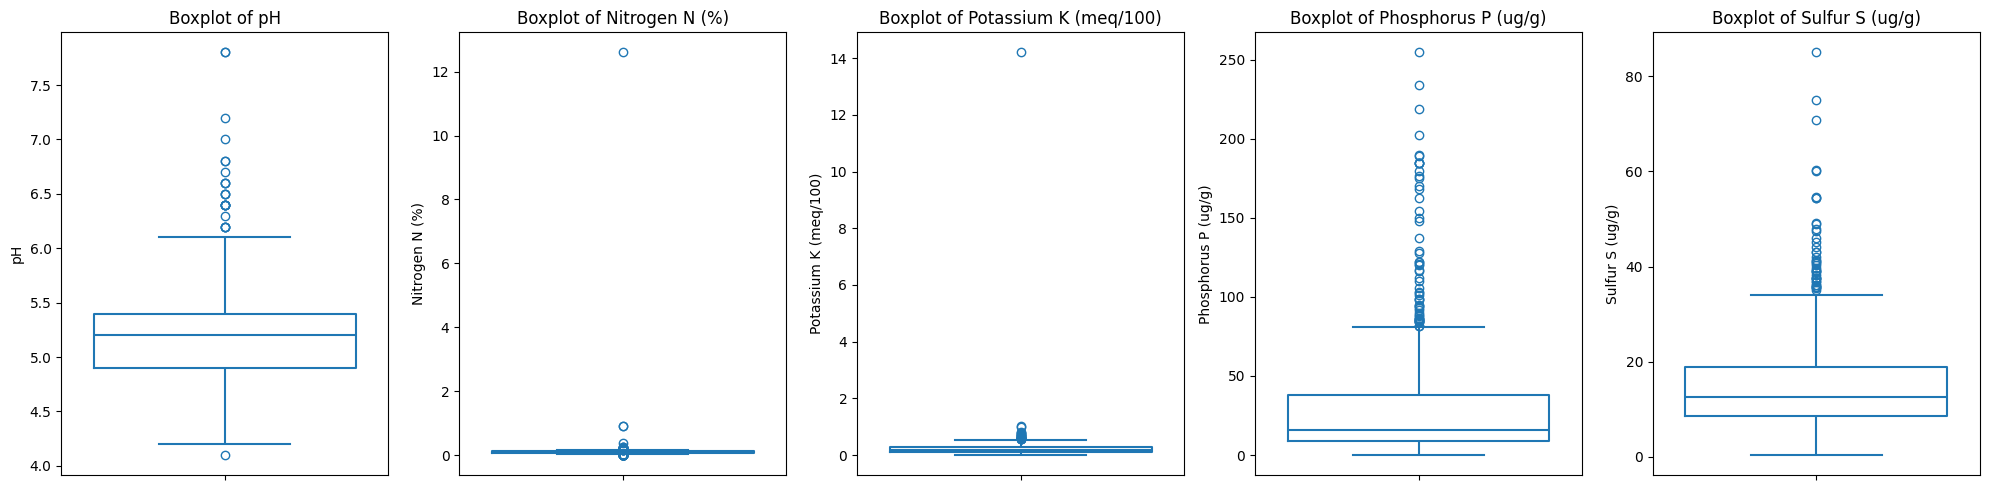

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df,
                y=col,
                ax=axes[i],
                # hue='Land class',
                fill=False,
                # palette='tab10',
                # legend=False,
    )
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Box Plot for Dependent variables

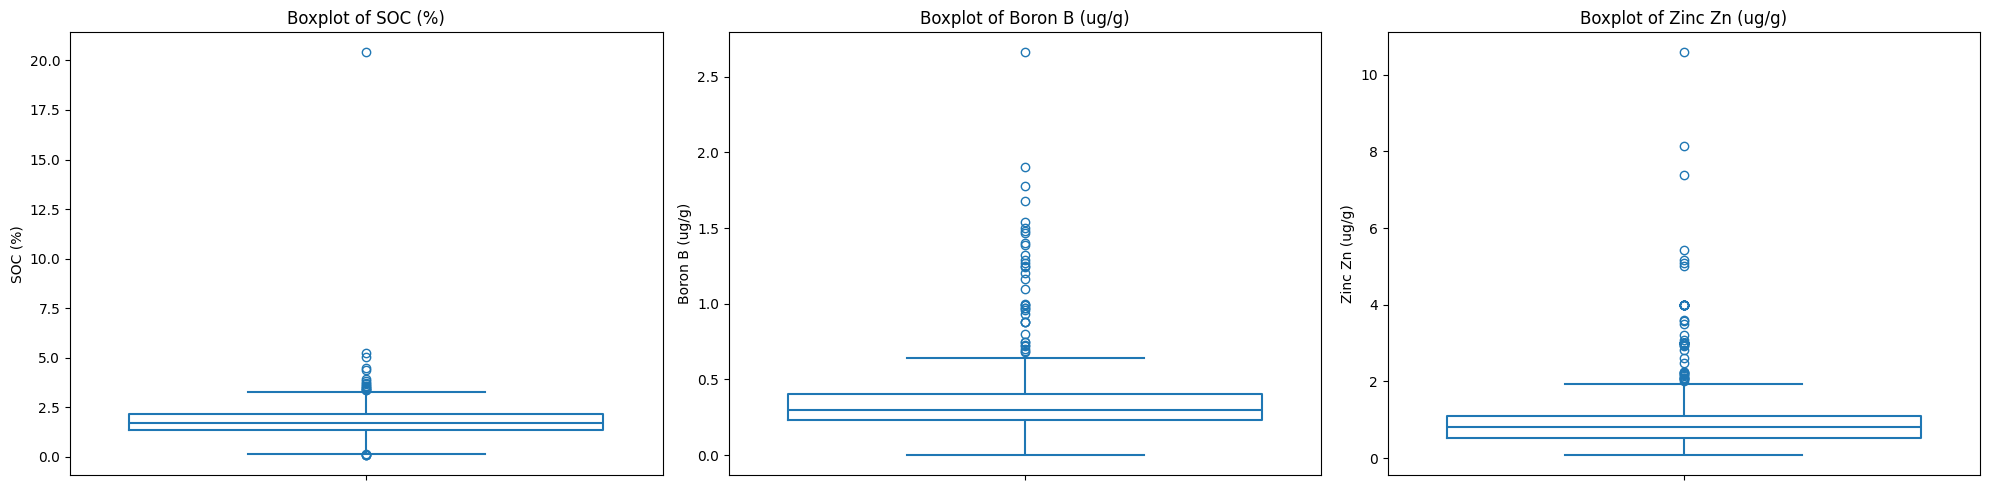

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes = axes.flatten()

for i, col in enumerate(target_cols):
    sns.boxplot(data=df,
                y=col,
                ax=axes[i],
                # hue='knit (surface)',
                fill=False,
                # palette='rocket',
                # alpha=.5,
                # warn_singular=False
                )
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Replacing outliers with median values

* We use Tuckey's method to detect outliers and replace the values with median values

In [ ]:
df_2 = df.copy()

In [ ]:
# replace outlier values with median values of that feaute column

for col in num_cols + target_cols:
    q1 = df_2[col].quantile(0.25)
    q3 = df_2[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df_2[col] = np.where((df_2[col] < lower_bound) | (df_2[col] > upper_bound),
                       df_2[col].median(),
                       df_2[col])

## Box plot of Independent variables after handling outliers

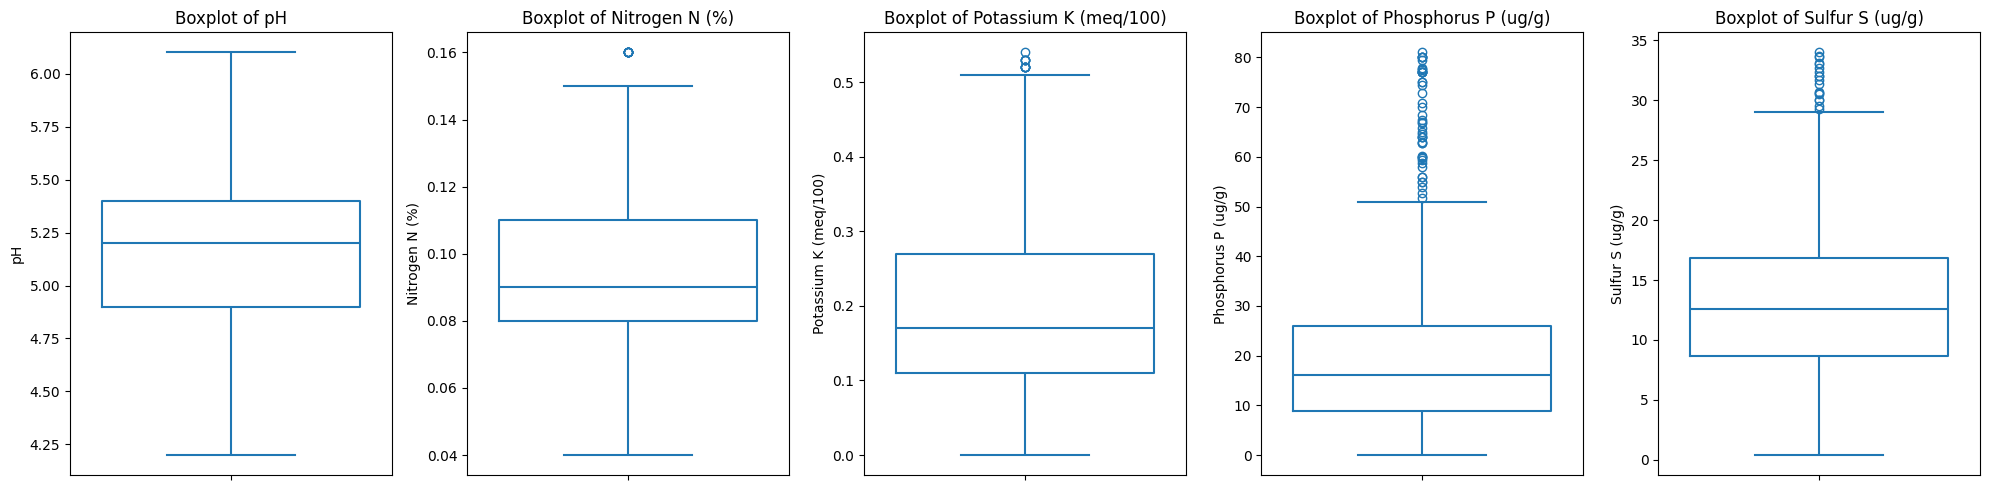

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df_2,
                y=col,
                ax=axes[i],
                # hue='knit (surface)',
                fill=False,
                # palette='rocket',
                # alpha=.5,
                # warn_singular=False
                )
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Box plot of Dependent variables after handling outliers

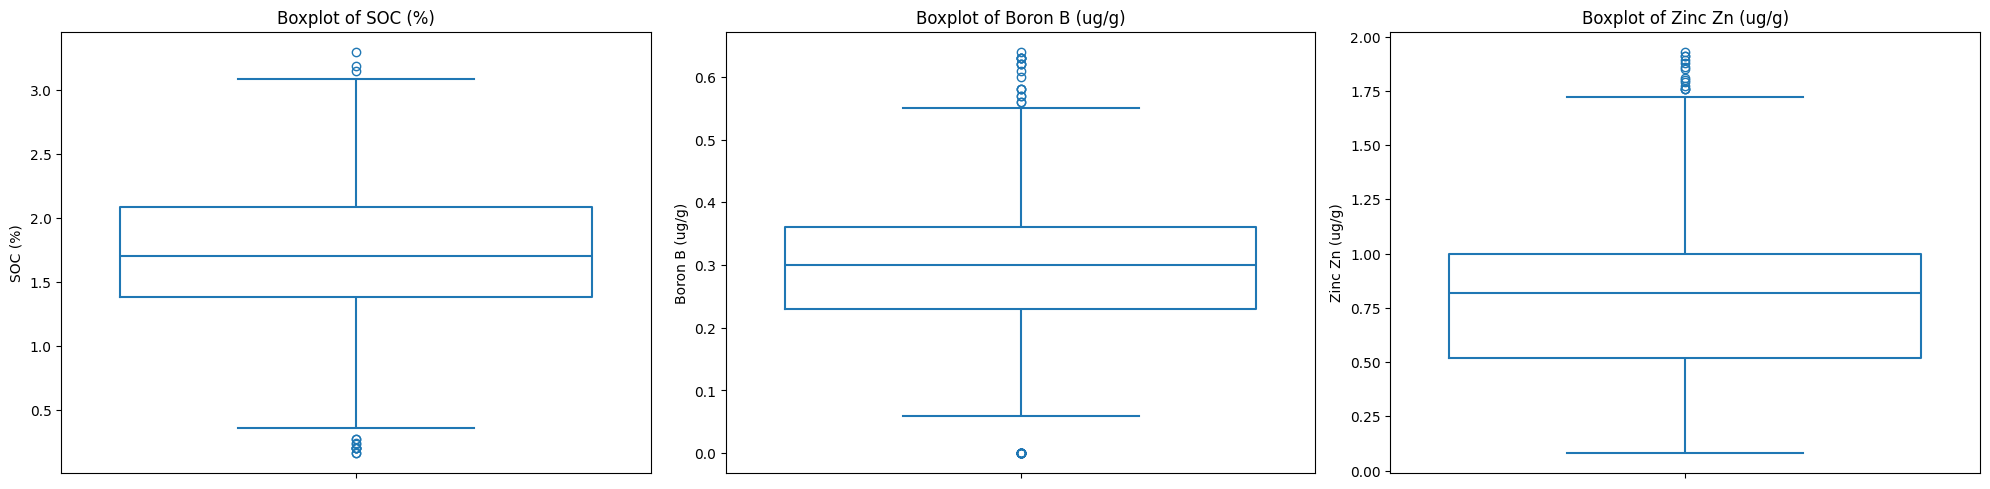

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes = axes.flatten()

for i, col in enumerate(target_cols):
    sns.boxplot(data=df_2,
                y=col,
                ax=axes[i],
                # hue='knit (surface)',
                fill=False,
                # palette='rocket',
                # alpha=.5,
                # warn_singular=False
                )
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Distribution after outliers handling

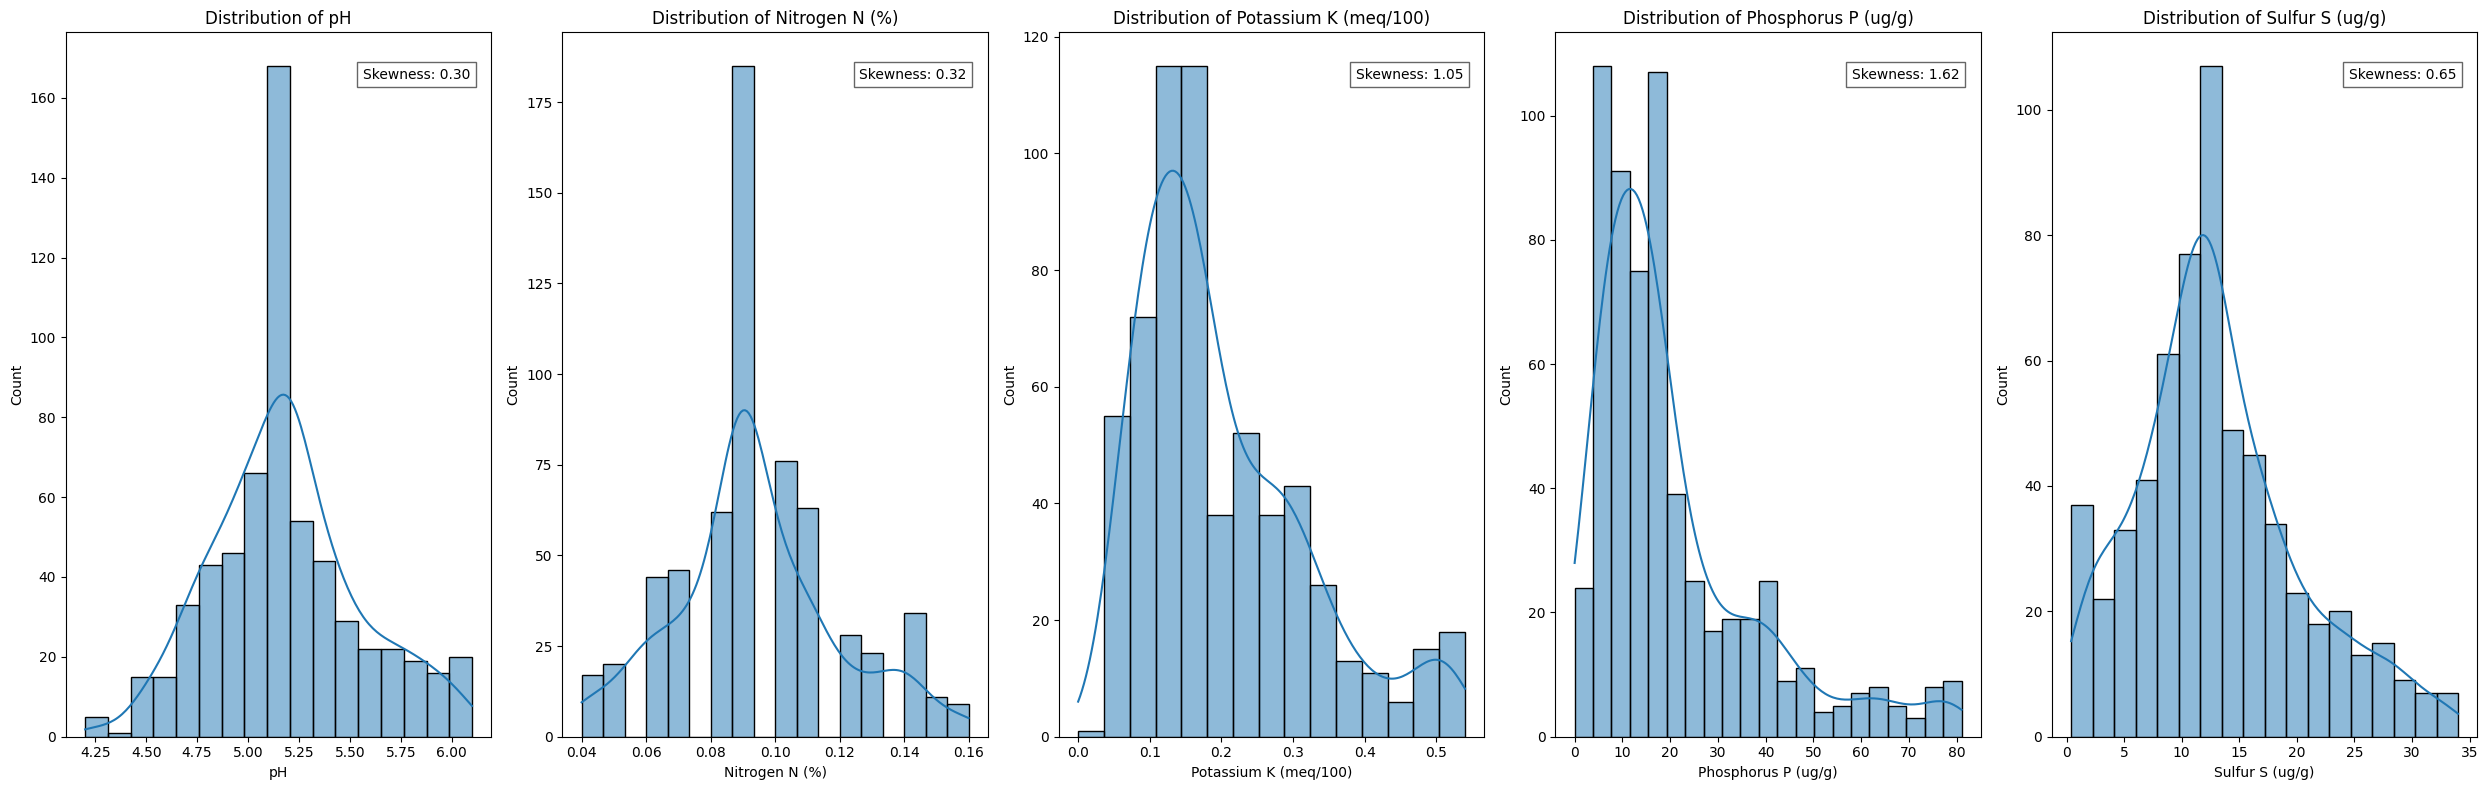

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 8))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df_2[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

    skew_val = df_2[col].skew()
    axes[i].text(0.95, 0.95, f'Skewness: {skew_val:.2f}',
                transform=axes[i].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

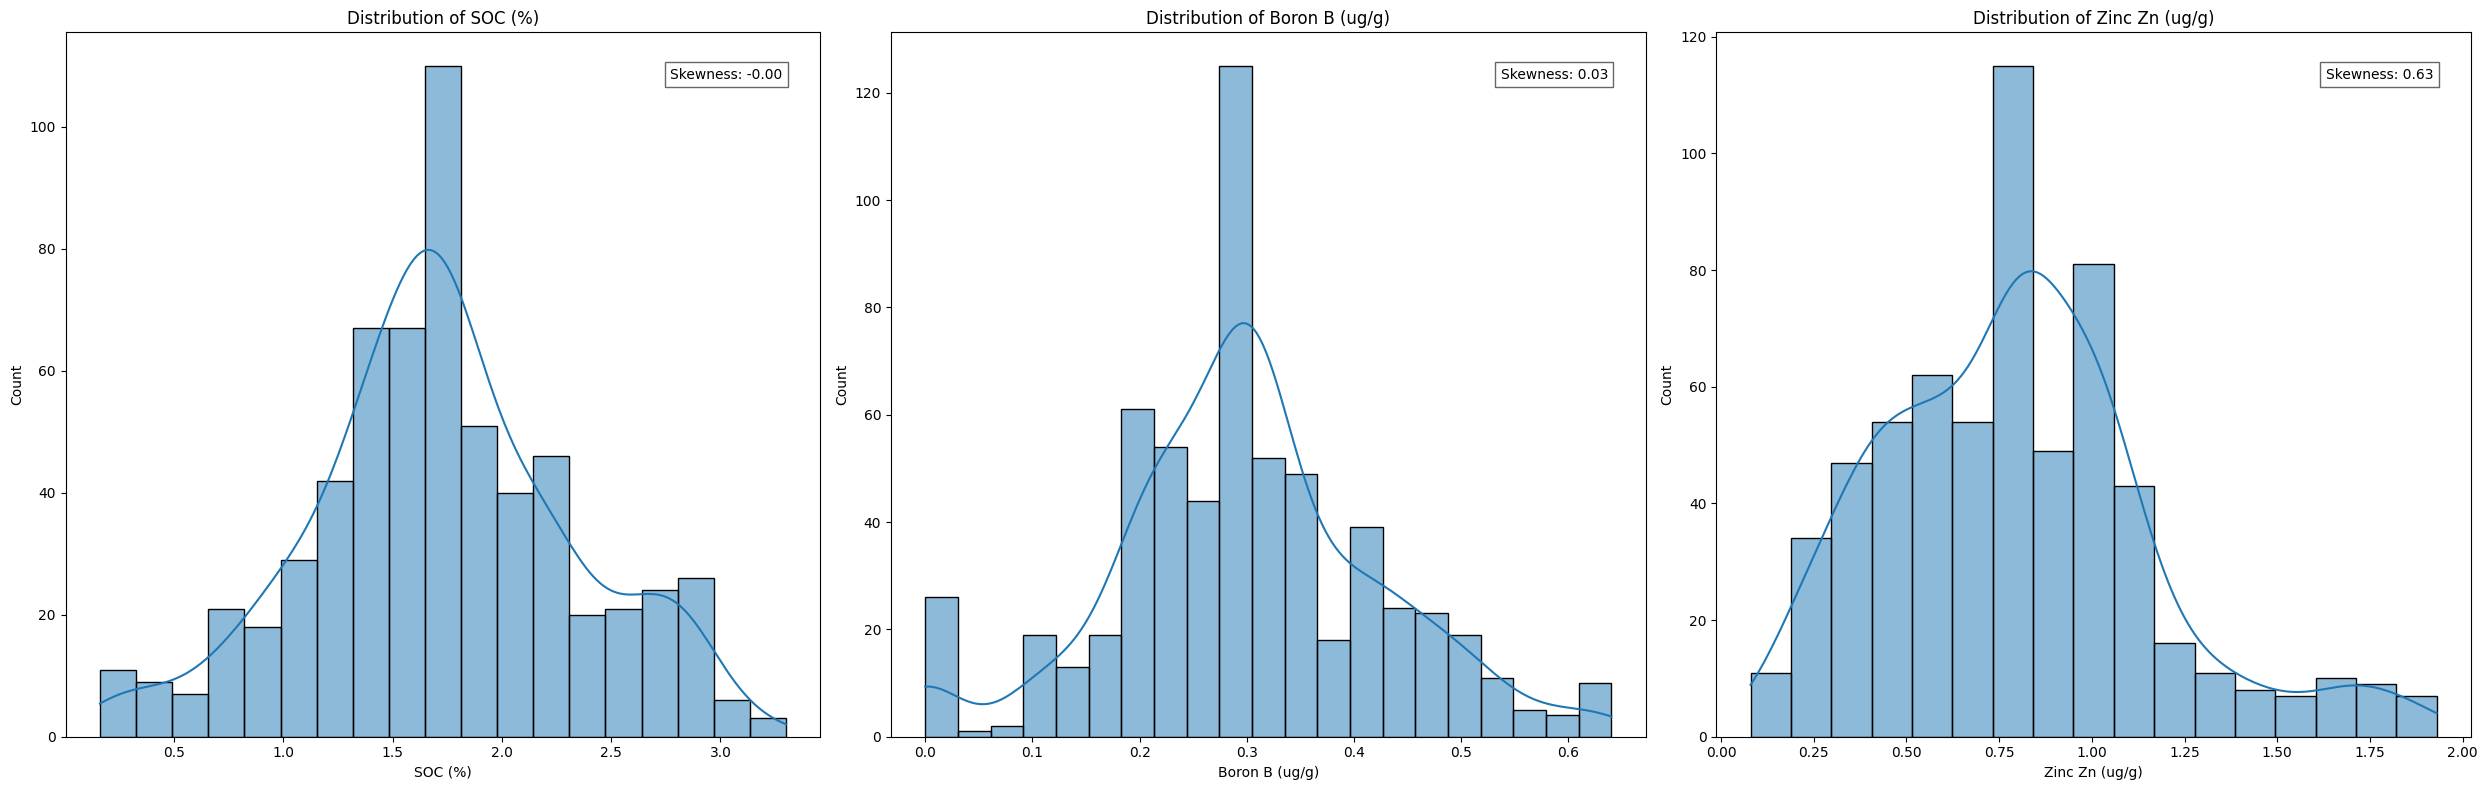

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

axes = axes.flatten()

for i, col in enumerate(target_cols):
    sns.histplot(df_2[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

    skew_val = df_2[col].skew()
    axes[i].text(0.95, 0.95, f'Skewness: {skew_val:.2f}',
                transform=axes[i].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

* After handling the outliers, the Feature variables and the Target variables are more or less normally distributed and the skewness has gone down.

## Heatmpas after handling outliers

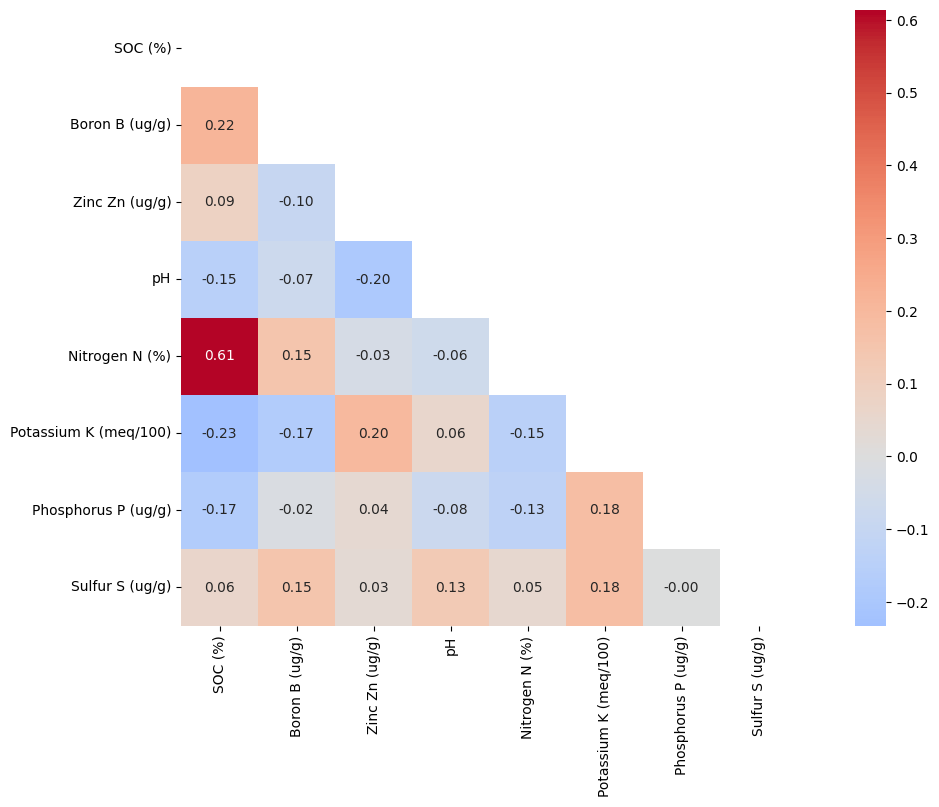

In [ ]:
corr =  df_2[target_cols + num_cols].corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
# cmap = sns.diverging_palette(100, 7, s=75, l=40,
#                             n=5, center="light", as_cmap=True)

plt.figure(figsize=(15, 8))

sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='coolwarm')

plt.show()

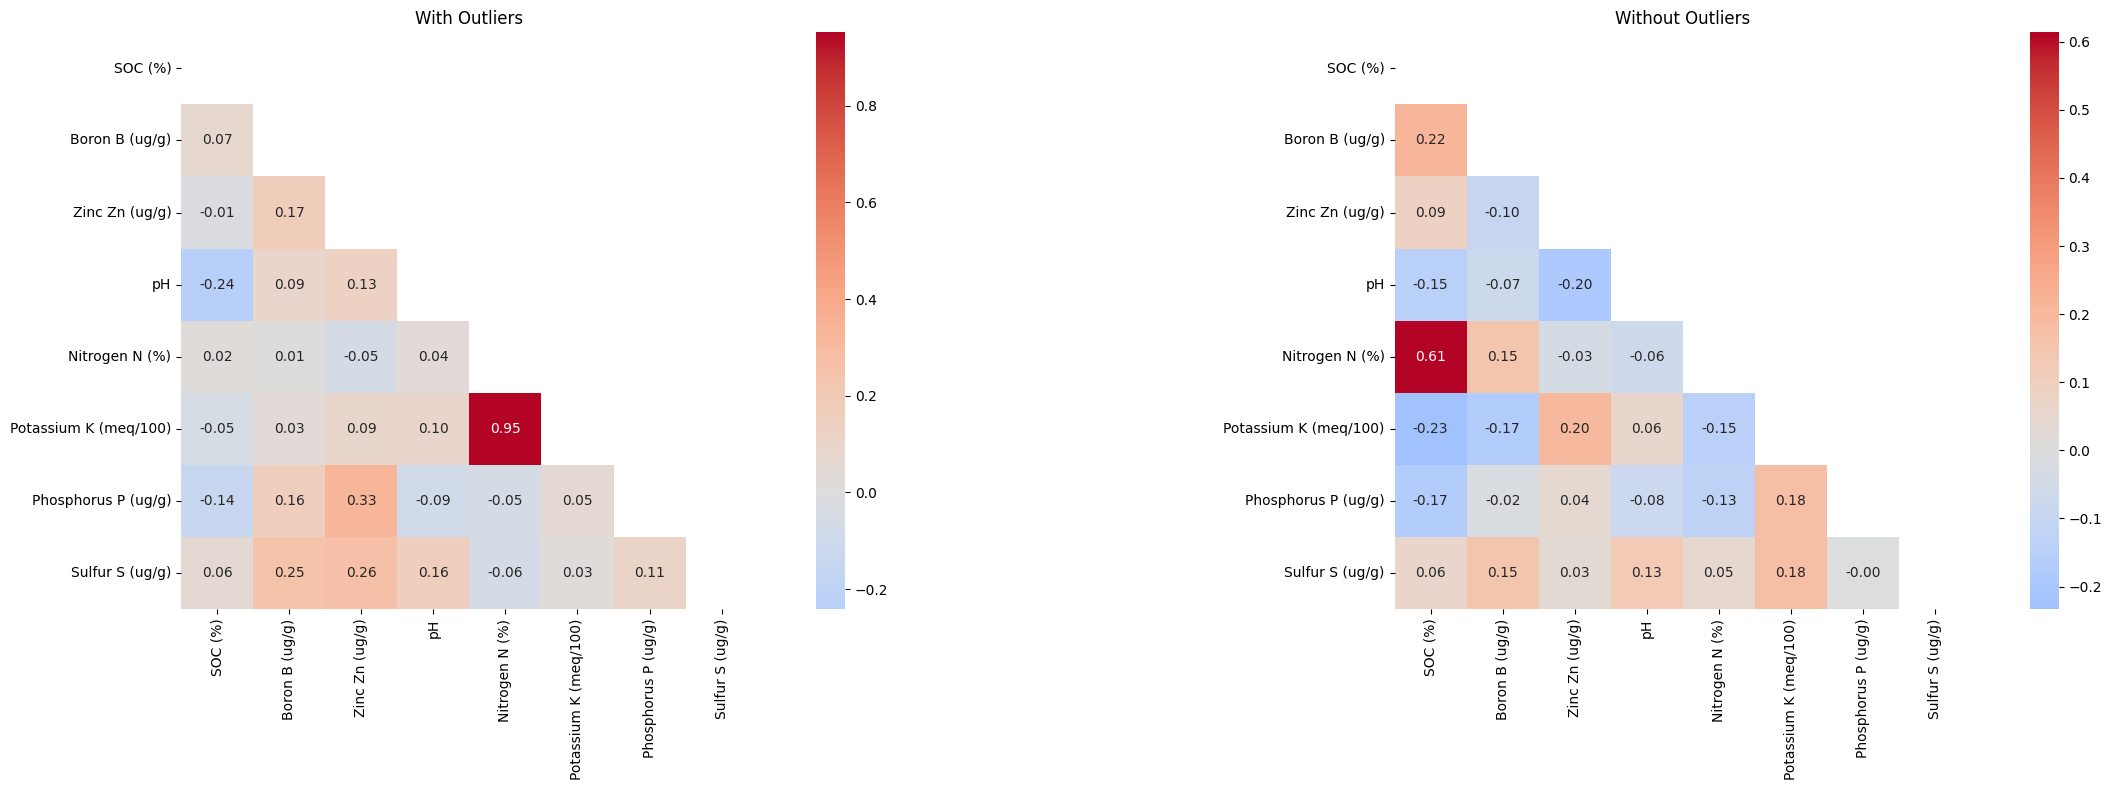

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8))

axes = axes.flatten()

corr_with_outl = df[target_cols + num_cols].corr()
corr_without_outl = df_2[target_cols + num_cols].corr()
# Create a mask

mask = np.triu(np.ones_like(corr_with_outl, dtype=bool))

# Create a custom divergin palette
# cmap = sns.diverging_palette(100, 7, s=75, l=40,
#                             n=5, center="light", as_cmap=True)

# plt.figure(figsize=(15, 8))

sns.heatmap(corr_with_outl, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='coolwarm', ax=axes[0])

axes[0].set_title('With Outliers')

mask = np.triu(np.ones_like(corr_without_outl, dtype=bool))

sns.heatmap(corr_without_outl, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Without Outliers')

plt.tight_layout()
plt.show()


* The correlation matrix changed a lot after we dealt with outliers.

* There was a strong positive relationship between **K** and **N** before handling outliers, but that has reduced a lot after outlier handling.

* **SOC** has much stronger positive relation with **N** now, also with **Boron** and slightly negative relation with **pH**, **K** and **P**

* **Boron** has slightly positive relation with **S** and **N** and negative relation with **P** and **Zn**

* **Zinc** has positive relation with **K** and negative relation with **pH**

In [ ]:
result = corr_full(df_2[target_cols + num_cols], rows=['corr', 'p-value' ])
result

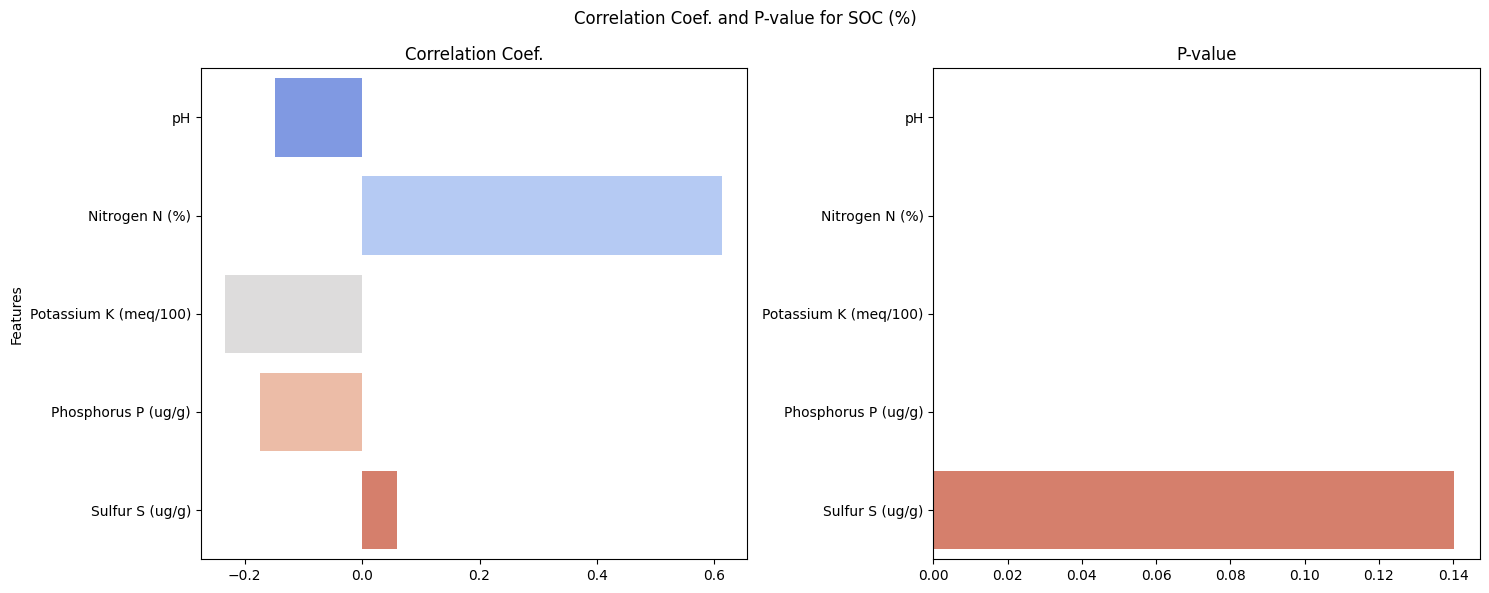

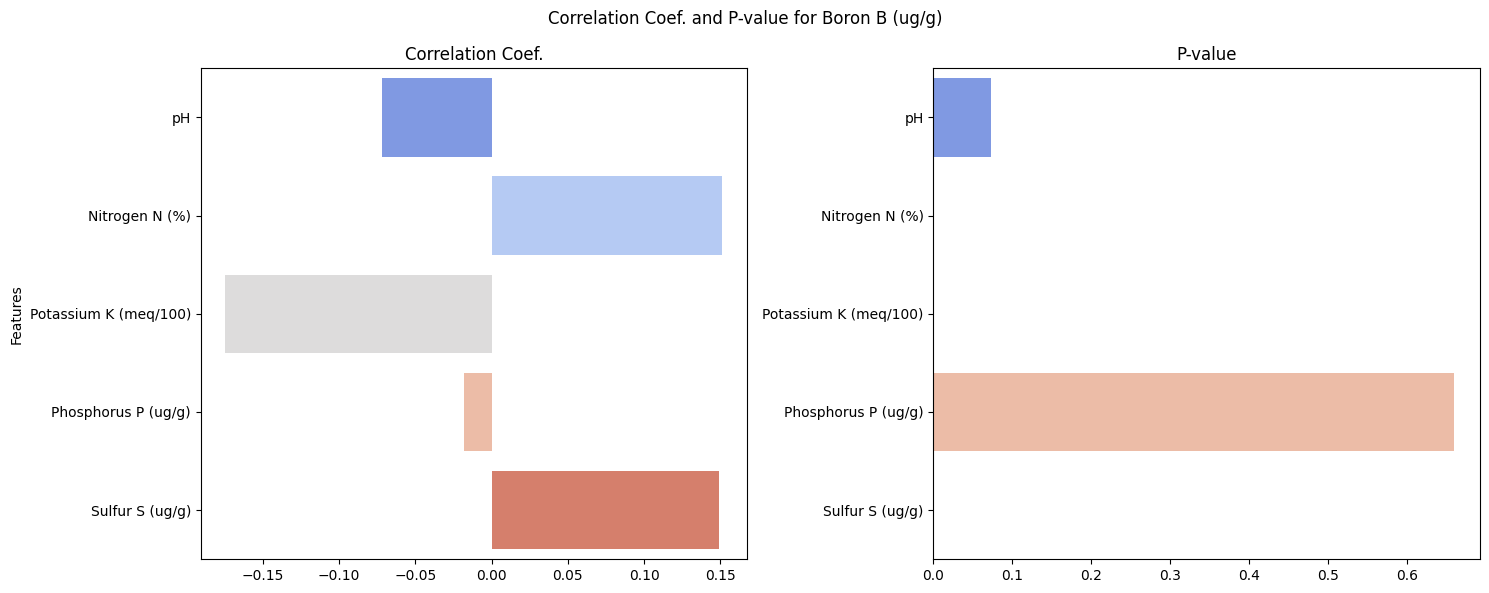

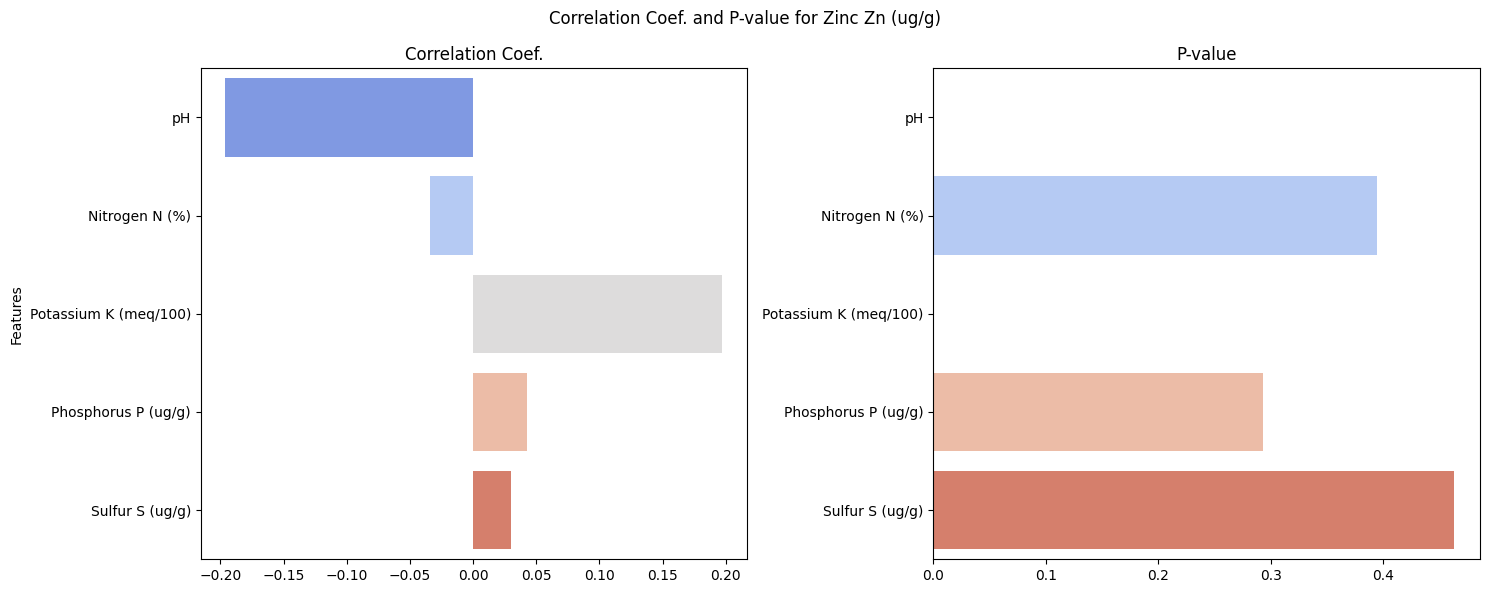

In [ ]:
# from anidipta's EDA notebook

axes = axes.flatten()

for idx, target_col in enumerate(target_cols):
    # calculate the correlation and p-values

    corr = df_2[[target_col] + num_cols].corr()[target_col]
    p_value = [pearsonr(df_2[col], df_2[target_col])[1] for col in num_cols]

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.barplot(y=corr.index[1:],
                x=corr.values[1:],
                palette='coolwarm',
                hue=corr.index[1:],
                legend=False,
                ax=axes[0])
    axes[0].set_title('Correlation Coef.')
    axes[0].set_ylabel('Features')

    sns.barplot(y=num_cols,
                x=p_value,
                palette='coolwarm',
                hue=num_cols,
                legend=False,
                ax=axes[1])

    axes[1].set_title('P-value')
    plt.suptitle(f"Correlation Coef. and P-value for {target_col}")
    plt.tight_layout()
    plt.show()
    print('\n')

# plt.tight_layout()
# plt.show()

* According to the **p-value** shown on the graph, significant feautes for --
    * **SOC**:
        * **pH**, **Nitrogen**, **Potassium**, **Phosphorus**
    * **Boron B**
        * **Nitrogen**, **Potassium**, **Sulfur**
    * **Zinc Zn**
        * **pH**, **Potassium**
    >  